In [6]:
#Librerías para manejo de datos
import pandas as pd
import numpy as np

#Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelar
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, StratifiedGroupKFold, StratifiedKFold, KFold,RandomizedSearchCV, RepeatedKFold, GridSearchCV, ParameterGrid
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score, make_scorer, classification_report
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

#Librería para tendencia al cluster
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#Librerías para visualización de barrios
import geopandas as gp
from seaborn import color_palette
import matplotlib.colors as colors

#grafico del arbol
from six import StringIO
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text #,export_graphviz
import sklearn as sk
#import dtreeviz.trees as dtreeviz

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification
import multiprocessing

from sklearn.svm import SVC

In [7]:
import matplotlib                                #  ESTO ARREGLA EL ERROR
from matplotlib import rcParams, rcParamsDefault #  findfont: Generic family 'sans-serif' not found because none of the following families were found: 
rcParams.update(rcParamsDefault)                 #  BORRAR UNA VEZ SEGUROS QUE YA NO PASE

# Ejercicio 3

## Construccion del target

Para esta tarea se debe crear una nueva variable tipo_precio que tendrá tres categorías: alto, medio, bajo. Esta nueva variable será nuestra clase en el problema de clasificación.
Para determinar cuándo el tipo_precio de una propiedad es alto, medio o bajo se deberá analizar el precio por metro cuadrado (pxm2). Se propone evaluar las siguientes alternativas para establecer los límites de cada categoría.

In [8]:
df_tprecio = pd.read_csv('./data/properati_argentina_2021_filtrado.csv')
df_tprecio['pxm2'] = round(df_tprecio["property_price"] / df_tprecio['property_surface_total'], 0)
df_tprecio

latitud   longitud              place_l3 property_type  \
0     -34.589974 -58.459133               Palermo          Casa   
1     -34.637319 -58.361124                  Boca  Departamento   
2     -34.628647 -58.361871                  Boca  Departamento   
3     -34.610027 -58.401934                  Once  Departamento   
4     -34.631621 -58.416825                 Boedo            PH   
...          ...        ...                   ...           ...   
82658 -34.603245 -58.489810      Villa del Parque  Departamento   
82659 -34.614063 -58.482814      Villa del Parque  Departamento   
82660 -34.614175 -58.479062      Villa del Parque  Departamento   
82661 -34.614175 -58.479062      Villa del Parque  Departamento   
82662 -34.599790 -58.373411  Centro / Microcentro  Departamento   

       property_rooms  property_bedrooms  property_surface_total  \
0                   4                  3              171.000000   
1                   3                  2               58.000000   
2                   4                  3               70.000000   
3                   4                  2              135.327513   
4                   4                  2              106.415511   
...               ...                ...                     ...   
82658               4                  3              130.000000   
82659               3                  2               68.000000   
82660               1                  1               51.000000   
82661               1                  1               37.000000   
82662               2                  1               84.000000   

       property_surface_covered  property_price    pxm2  
0                         133.0        210000.0  1228.0  
1                          55.0         82900.0  1429.0  
2                          70.0         99000.0  1414.0  
3                         104.0        146000.0  1079.0  
4                          73.0        250000.0  2349.0  
...                         ...             ...     ...  
82658                     100.0        220000.0  1692.0  
82659                      60.0        161000.0  2368.0  
82660                      30.0         75500.0  1480.0  
82661                      31.0         74500.0  2014.0  
82662                      84.0        135000.0  1607.0  

[82663 rows x 10 columns]

Dado los outliers vistos acá arriba se procede a normalizar el pxm2 de las propiedades

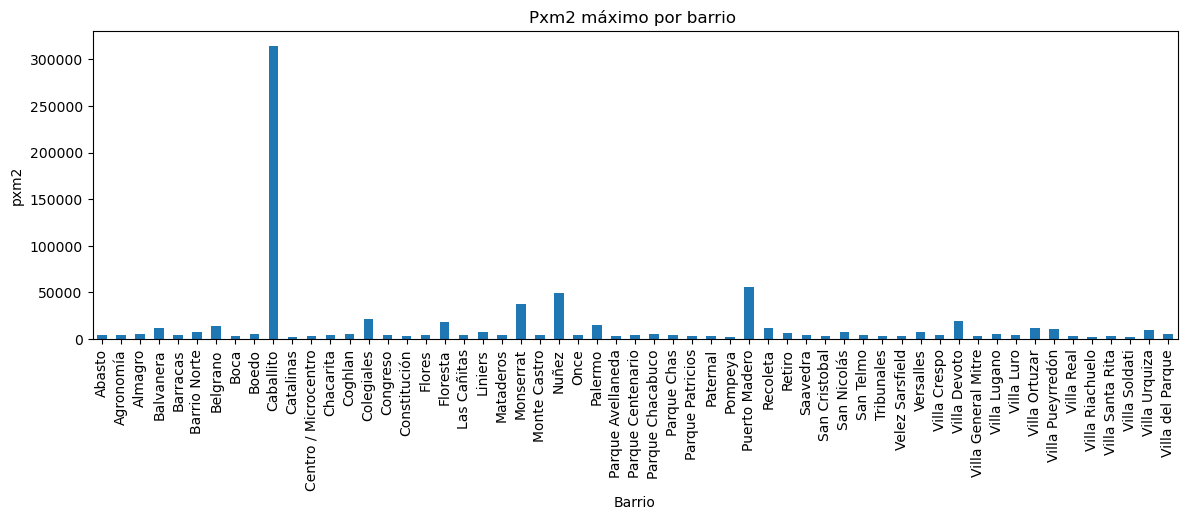

In [9]:
plt.rcParams['figure.figsize'] = (14,4)
df_tprecio.groupby(by=['place_l3'])['pxm2'].max().plot.bar(alpha=1 , title="Pxm2 máximo por barrio " , xlabel="Barrio" , ylabel="pxm2")
plt.show()

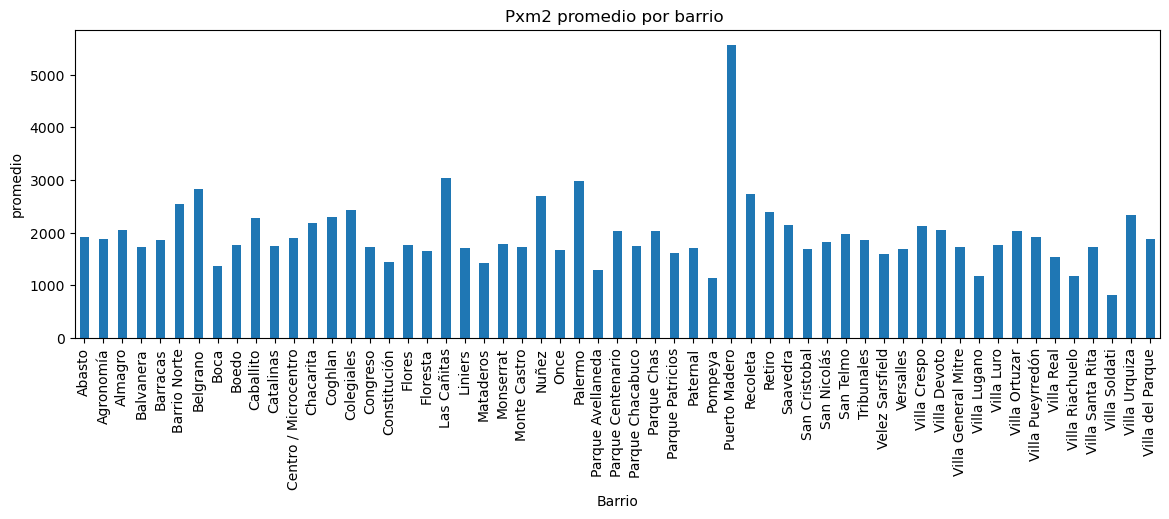

In [10]:
promedios_por_barrio = df_tprecio.groupby(by=['place_l3'])['pxm2'].mean()
promedios_por_barrio.plot.bar(alpha=1 , title="Pxm2 promedio por barrio " , xlabel="Barrio" , ylabel="promedio")
plt.show()

Si bien Caballito tenía un outlier muy grande, el promedio se ve bien

In [11]:
# Este max_pxm2_promedio va a ser el valor de arriba de Puerto Madero
max_pxm2_promedio = df_tprecio.groupby(by=['place_l3'])['pxm2'].mean().max();
promedios_por_barrio_dict = promedios_por_barrio.to_dict()
promedios_por_barrio_dict

{'Abasto': 1926.9064039408868,
 'Agronomía': 1873.762331838565,
 'Almagro': 2059.9690837549183,
 'Balvanera': 1722.9930222416049,
 'Barracas': 1860.9257602862253,
 'Barrio Norte': 2537.8816955684006,
 'Belgrano': 2839.331240188383,
 'Boca': 1365.8885630498535,
 'Boedo': 1762.8474280732346,
 'Caballito': 2277.3496742165685,
 'Catalinas': 1743.2857142857142,
 'Centro / Microcentro': 1894.9714285714285,
 'Chacarita': 2186.8810289389066,
 'Coghlan': 2293.463276836158,
 'Colegiales': 2434.5005834305716,
 'Congreso': 1721.155069582505,
 'Constitución': 1436.0171149144255,
 'Flores': 1770.4046446164673,
 'Floresta': 1649.892561983471,
 'Las Cañitas': 3039.5384615384614,
 'Liniers': 1703.462311557789,
 'Mataderos': 1427.2005943536403,
 'Monserrat': 1794.7264529058116,
 'Monte Castro': 1725.2820512820513,
 'Nuñez': 2696.7256922086285,
 'Once': 1670.8147368421053,
 'Palermo': 2978.0555055259924,
 'Parque Avellaneda': 1289.215258855586,
 'Parque Centenario': 2027.108695652174,
 'Parque Chacabuco'

In [12]:
def corregir_pxm2(pxm2, place):
    return pxm2 if pxm2 < max_pxm2_promedio else round(promedios_por_barrio_dict[place], 0)

df_tprecio['pxm2'] = df_tprecio.apply(lambda row: corregir_pxm2(row['pxm2'], row['place_l3']), axis=1)

# Verificamos que los máximos de cada barrio estén más normalizados

plt.rcParams['figure.figsize'] = (14,4)
df_tprecio.groupby(by=['place_l3'])['pxm2'].max().plot.bar(alpha=1 , title="Pxm2 máximo por barrio " , xlabel="Barrio" , ylabel="pxm2")

<AxesSubplot:title={'center':'Pxm2 máximo por barrio '}, xlabel='Barrio', ylabel='pxm2'>

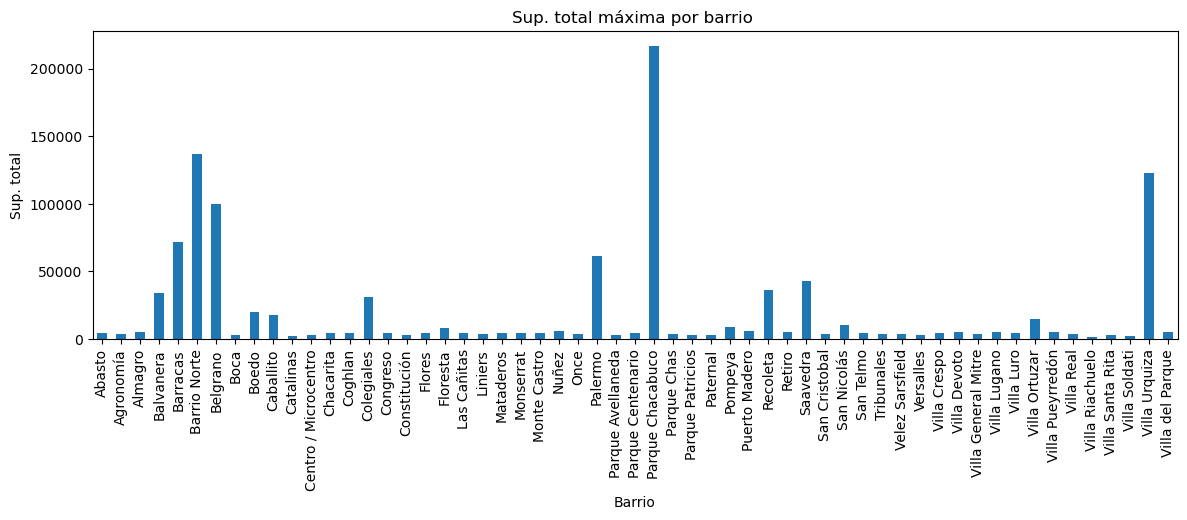

In [13]:
plt.rcParams['figure.figsize'] = (14,4)
df_tprecio.groupby(by=['place_l3'])['property_surface_total'].max().plot.bar(alpha=1 , title="Sup. total máxima por barrio " , xlabel="Barrio" , ylabel="Sup. total")
plt.show()

Dado los outliers vistos arriba se procede a normalizar la superficie total de las propiedades

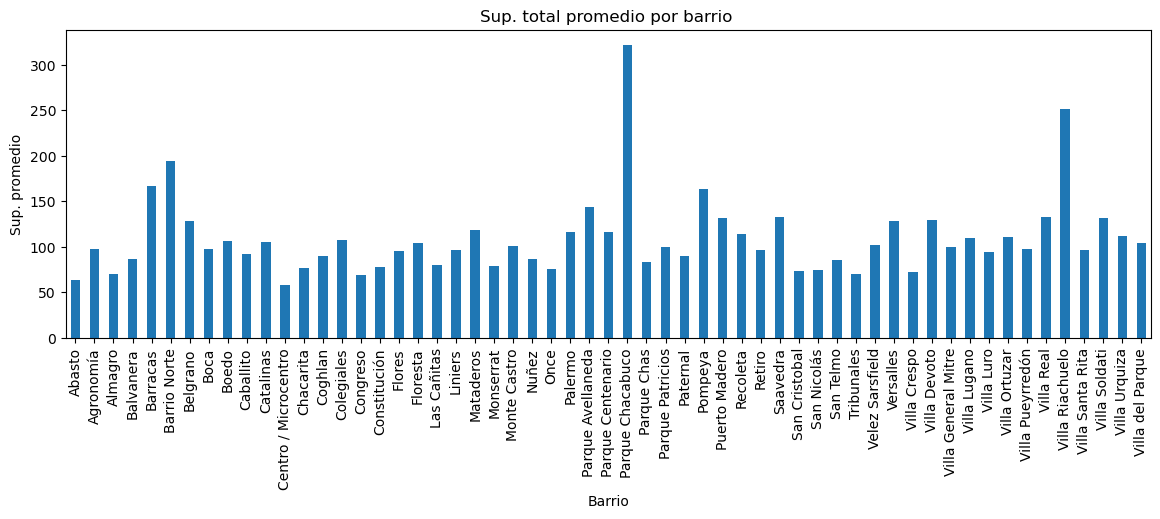

In [14]:
sup_total_promedios_por_barrio = df_tprecio.groupby(by=['place_l3'])['property_surface_total'].mean()
plt.rcParams['figure.figsize'] = (14,4)
sup_total_promedios_por_barrio.plot.bar(alpha=1 , title="Sup. total promedio por barrio " , xlabel="Barrio" , ylabel="Sup. promedio")
plt.show()

Los promedios no se ven tan fuera de lo normal a excepción de Parque Chacabuco, pero dada la operación realizada sus valores se van a normalizar un poco

In [15]:
max_sup_total_promedio = df_tprecio.groupby(by=['place_l3'])['property_surface_total'].mean().max()
sup_total_promedios_por_barrio_dict = sup_total_promedios_por_barrio.to_dict()
sup_total_promedios_por_barrio_dict

{'Abasto': 63.29254384458627,
 'Agronomía': 97.83256147732801,
 'Almagro': 70.56164926084936,
 'Balvanera': 86.70414656195379,
 'Barracas': 166.60630718159305,
 'Barrio Norte': 194.00447009761987,
 'Belgrano': 128.76429913052735,
 'Boca': 97.92136850278632,
 'Boedo': 106.91545151470086,
 'Caballito': 92.49163620292498,
 'Catalinas': 105.71428571428571,
 'Centro / Microcentro': 58.24285714285714,
 'Chacarita': 76.94167588783039,
 'Coghlan': 90.2877349819646,
 'Colegiales': 108.00951635811133,
 'Congreso': 69.08475928142832,
 'Constitución': 77.56989997530412,
 'Flores': 95.63335744885448,
 'Floresta': 103.91690582547845,
 'Las Cañitas': 80.04146035528325,
 'Liniers': 97.03046485165895,
 'Mataderos': 118.69744349571039,
 'Monserrat': 79.35123543447443,
 'Monte Castro': 101.46593395463944,
 'Nuñez': 86.27835379638627,
 'Once': 75.75345226553571,
 'Palermo': 116.39734168639146,
 'Parque Avellaneda': 143.84195055713332,
 'Parque Centenario': 115.85361630862754,
 'Parque Chacabuco': 322.0704

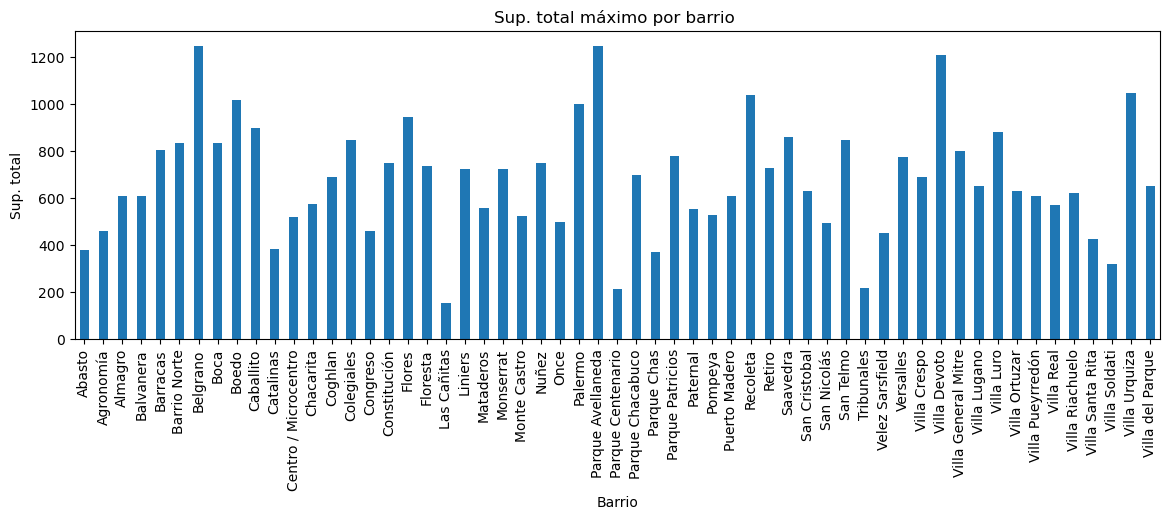

In [16]:
def corregir_sup_total(sup_total, place):
    return sup_total if sup_total <= (10 * sup_total_promedios_por_barrio_dict[place]) else sup_total_promedios_por_barrio_dict[place]

df_tprecio['property_surface_total'] = df_tprecio.apply(lambda row: corregir_sup_total(row['property_surface_total'], row['place_l3']), axis=1)

#Verificamos que los máximos de cada barrio estén más normalizados
plt.rcParams['figure.figsize'] = (14,4)
df_tprecio.groupby(by=['place_l3'])['property_surface_total'].max().plot.bar(alpha=1 , title="Sup. total máximo por barrio " , xlabel="Barrio" , ylabel="Sup. total")
plt.show()

### Dividir la variable pxm2 en 3 intervalos con igual cantidad de observaciones.

In [17]:
df_tprecio1 = df_tprecio.copy()

In [18]:
df_tprecio1["tipo_precio"] = pd.qcut( df_tprecio1["pxm2"],
                            q=3, # Separo en tres categorias iguales
                            labels=["bajo", "medio", "alto"])

df_tprecio1

latitud   longitud              place_l3 property_type  \
0     -34.589974 -58.459133               Palermo          Casa   
1     -34.637319 -58.361124                  Boca  Departamento   
2     -34.628647 -58.361871                  Boca  Departamento   
3     -34.610027 -58.401934                  Once  Departamento   
4     -34.631621 -58.416825                 Boedo            PH   
...          ...        ...                   ...           ...   
82658 -34.603245 -58.489810      Villa del Parque  Departamento   
82659 -34.614063 -58.482814      Villa del Parque  Departamento   
82660 -34.614175 -58.479062      Villa del Parque  Departamento   
82661 -34.614175 -58.479062      Villa del Parque  Departamento   
82662 -34.599790 -58.373411  Centro / Microcentro  Departamento   

       property_rooms  property_bedrooms  property_surface_total  \
0                   4                  3              171.000000   
1                   3                  2               58.000000   
2                   4                  3               70.000000   
3                   4                  2              135.327513   
4                   4                  2              106.415511   
...               ...                ...                     ...   
82658               4                  3              130.000000   
82659               3                  2               68.000000   
82660               1                  1               51.000000   
82661               1                  1               37.000000   
82662               2                  1               84.000000   

       property_surface_covered  property_price    pxm2 tipo_precio  
0                         133.0        210000.0  1228.0        bajo  
1                          55.0         82900.0  1429.0        bajo  
2                          70.0         99000.0  1414.0        bajo  
3                         104.0        146000.0  1079.0        bajo  
4                          73.0        250000.0  2349.0       medio  
...                         ...             ...     ...         ...  
82658                     100.0        220000.0  1692.0        bajo  
82659                      60.0        161000.0  2368.0       medio  
82660                      30.0         75500.0  1480.0        bajo  
82661                      31.0         74500.0  2014.0       medio  
82662                      84.0        135000.0  1607.0        bajo  

[82663 rows x 11 columns]

Verifico que se haya separado (aproximadamente) en partes iguales

In [19]:
df_tprecio1["tipo_precio"].value_counts()

bajo     27566
alto     27550
medio    27547
Name: tipo_precio, dtype: int64

### Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones, el siguiente con el 50% y el ultimo con el 25% de las observaciones restantes.

In [20]:
df_tprecio2 = df_tprecio.copy()

In [21]:
df_tprecio2["tipo_precio"] = pd.qcut( df_tprecio2["pxm2"],
                            [0, .25, .75, 1],
                            labels=["bajo", "medio", "alto"])

df_tprecio2

latitud   longitud              place_l3 property_type  \
0     -34.589974 -58.459133               Palermo          Casa   
1     -34.637319 -58.361124                  Boca  Departamento   
2     -34.628647 -58.361871                  Boca  Departamento   
3     -34.610027 -58.401934                  Once  Departamento   
4     -34.631621 -58.416825                 Boedo            PH   
...          ...        ...                   ...           ...   
82658 -34.603245 -58.489810      Villa del Parque  Departamento   
82659 -34.614063 -58.482814      Villa del Parque  Departamento   
82660 -34.614175 -58.479062      Villa del Parque  Departamento   
82661 -34.614175 -58.479062      Villa del Parque  Departamento   
82662 -34.599790 -58.373411  Centro / Microcentro  Departamento   

       property_rooms  property_bedrooms  property_surface_total  \
0                   4                  3              171.000000   
1                   3                  2               58.000000   
2                   4                  3               70.000000   
3                   4                  2              135.327513   
4                   4                  2              106.415511   
...               ...                ...                     ...   
82658               4                  3              130.000000   
82659               3                  2               68.000000   
82660               1                  1               51.000000   
82661               1                  1               37.000000   
82662               2                  1               84.000000   

       property_surface_covered  property_price    pxm2 tipo_precio  
0                         133.0        210000.0  1228.0        bajo  
1                          55.0         82900.0  1429.0        bajo  
2                          70.0         99000.0  1414.0        bajo  
3                         104.0        146000.0  1079.0        bajo  
4                          73.0        250000.0  2349.0       medio  
...                         ...             ...     ...         ...  
82658                     100.0        220000.0  1692.0        bajo  
82659                      60.0        161000.0  2368.0       medio  
82660                      30.0         75500.0  1480.0        bajo  
82661                      31.0         74500.0  2014.0       medio  
82662                      84.0        135000.0  1607.0        bajo  

[82663 rows x 11 columns]

In [22]:
df_tprecio2["tipo_precio"].value_counts()

medio    41435
bajo     20683
alto     20545
Name: tipo_precio, dtype: int64

La categoria "medio" representa el 50% de las observaciones, mientras que tanto "bajo" como "alto" posee un 25% cada una.

### Trabajar la variable pxm2 relativa a cada tipo de propiedad y luego dividirla como en el punto anterior.

In [23]:
df_tprecio3 = df_tprecio.copy()

In [24]:
df_tprecio3["tipo_precio"] = df_tprecio3.groupby("property_type").apply(
                            lambda propiedad: 
                                pd.qcut(propiedad['pxm2'], 
                                [0, .25, .75, 1], 
                                labels=["bajo", "medio", "alto"]
                            )).reset_index(drop=True)

df_tprecio3

latitud   longitud              place_l3 property_type  \
0     -34.589974 -58.459133               Palermo          Casa   
1     -34.637319 -58.361124                  Boca  Departamento   
2     -34.628647 -58.361871                  Boca  Departamento   
3     -34.610027 -58.401934                  Once  Departamento   
4     -34.631621 -58.416825                 Boedo            PH   
...          ...        ...                   ...           ...   
82658 -34.603245 -58.489810      Villa del Parque  Departamento   
82659 -34.614063 -58.482814      Villa del Parque  Departamento   
82660 -34.614175 -58.479062      Villa del Parque  Departamento   
82661 -34.614175 -58.479062      Villa del Parque  Departamento   
82662 -34.599790 -58.373411  Centro / Microcentro  Departamento   

       property_rooms  property_bedrooms  property_surface_total  \
0                   4                  3              171.000000   
1                   3                  2               58.000000   
2                   4                  3               70.000000   
3                   4                  2              135.327513   
4                   4                  2              106.415511   
...               ...                ...                     ...   
82658               4                  3              130.000000   
82659               3                  2               68.000000   
82660               1                  1               51.000000   
82661               1                  1               37.000000   
82662               2                  1               84.000000   

       property_surface_covered  property_price    pxm2 tipo_precio  
0                         133.0        210000.0  1228.0       medio  
1                          55.0         82900.0  1429.0       medio  
2                          70.0         99000.0  1414.0       medio  
3                         104.0        146000.0  1079.0        alto  
4                          73.0        250000.0  2349.0       medio  
...                         ...             ...     ...         ...  
82658                     100.0        220000.0  1692.0       medio  
82659                      60.0        161000.0  2368.0        alto  
82660                      30.0         75500.0  1480.0        alto  
82661                      31.0         74500.0  2014.0        alto  
82662                      84.0        135000.0  1607.0        alto  

[82663 rows x 11 columns]

In [25]:
df_tprecio3["tipo_precio"].value_counts()

medio    41272
bajo     20741
alto     20650
Name: tipo_precio, dtype: int64

# Ejercicio 3a

### Mostrar la distribucion del precio por metro cuadrado.

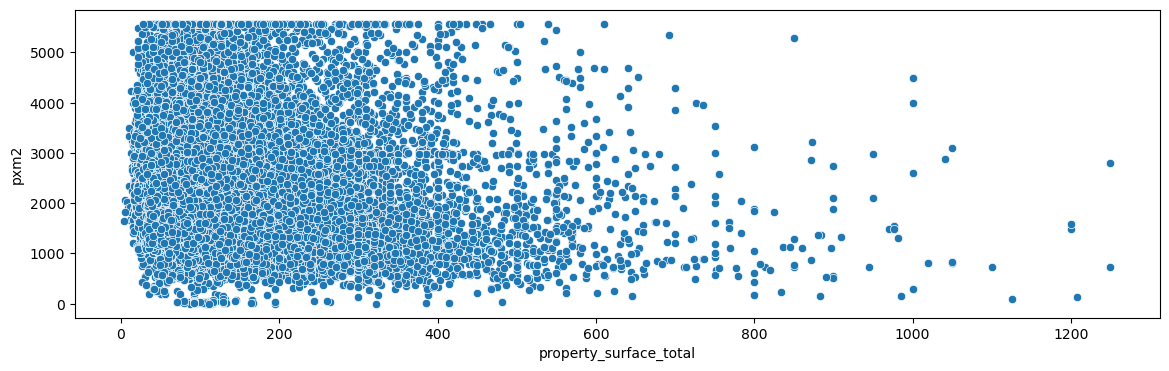

In [26]:
sns.scatterplot(data=df_tprecio1, x='property_surface_total', y="pxm2") 
plt.show()

Distribución dividiendo el precio por metro cuadrado en partes iguales.

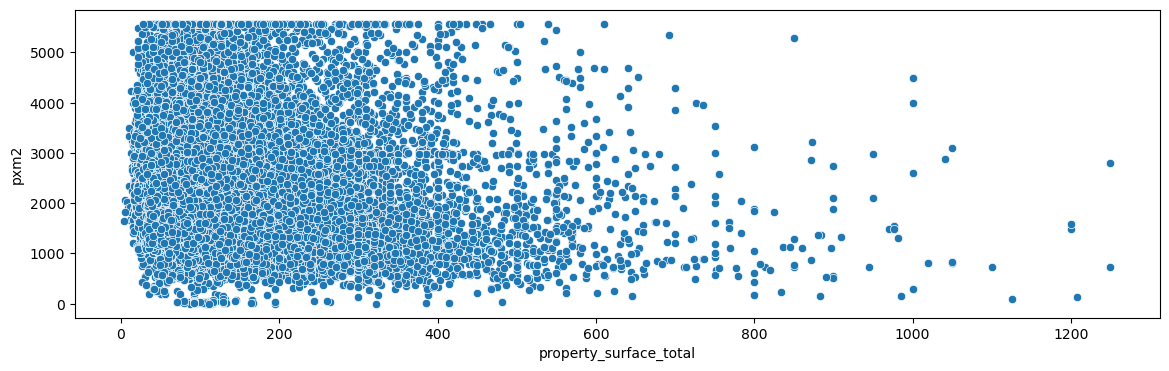

In [27]:
sns.scatterplot(data=df_tprecio2, x='property_surface_total', y="pxm2") 
plt.show()

Distrubución 25% bajo, 50% medio, 25% alto.

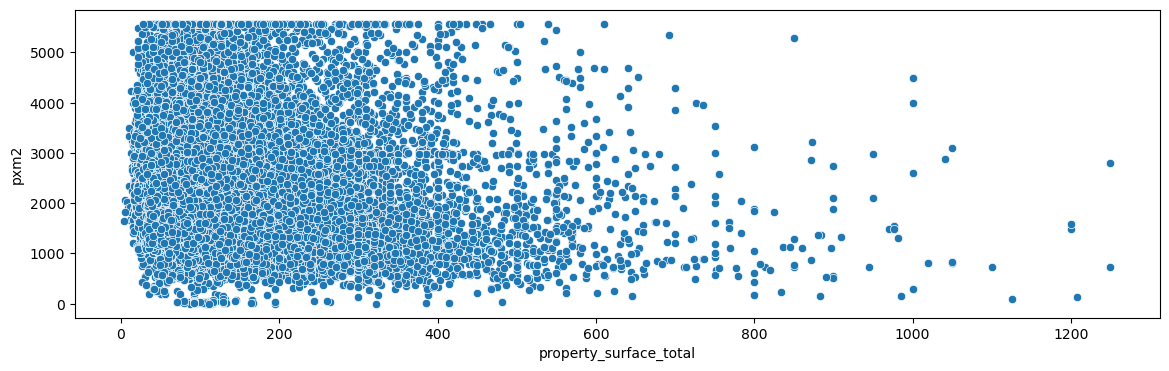

In [28]:
sns.scatterplot(data=df_tprecio3, x='property_surface_total', y="pxm2") 
plt.show()

Distribucion agrupando previamente por tipo de propiedad, se observa como se mezclan las categorias a diferencia de los dos casos anteriores.

### Mostrar la distribucion del precio por metro cuadrado por tipo de propiedad

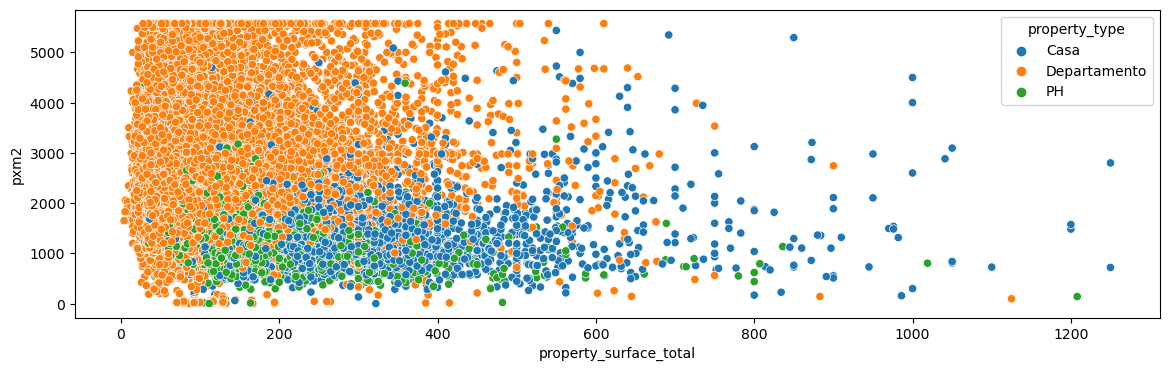

In [29]:
sns.scatterplot(data=df_tprecio1, x='property_surface_total', y="pxm2", hue="property_type")
plt.show() 

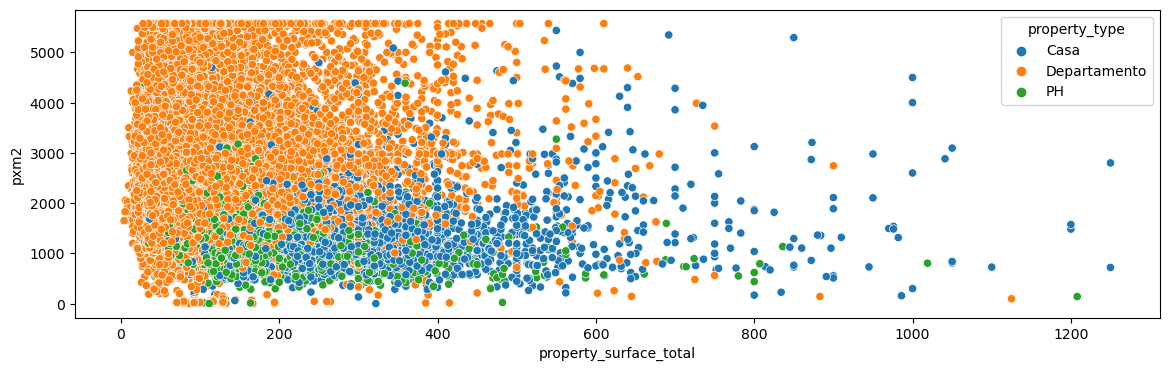

In [30]:
sns.scatterplot(data=df_tprecio2, x='property_surface_total', y="pxm2", hue="property_type")
plt.show()

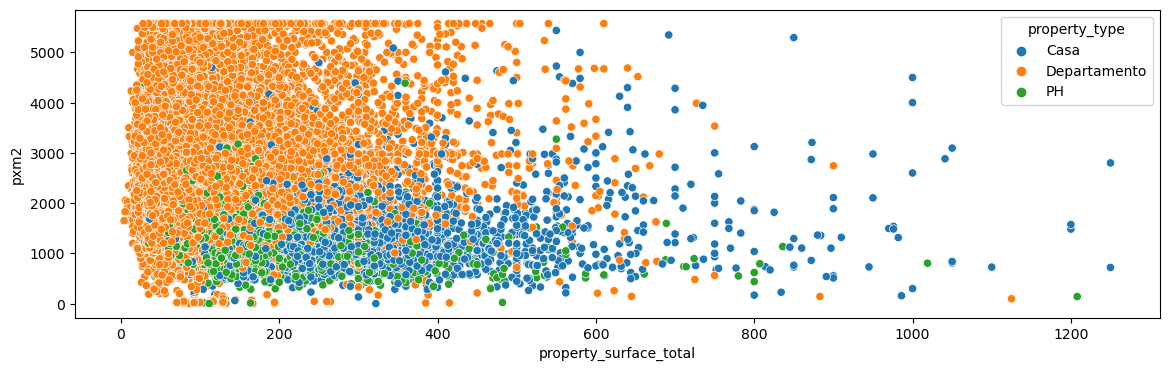

In [31]:
sns.scatterplot(data=df_tprecio3, x='property_surface_total', y="pxm2", hue="property_type") 
plt.show()

### Por cada una de las tres alternativas mostrar graficamente la distribución de la nueva variable creada tipo_precio

Agrupamiento en tres partes iguales

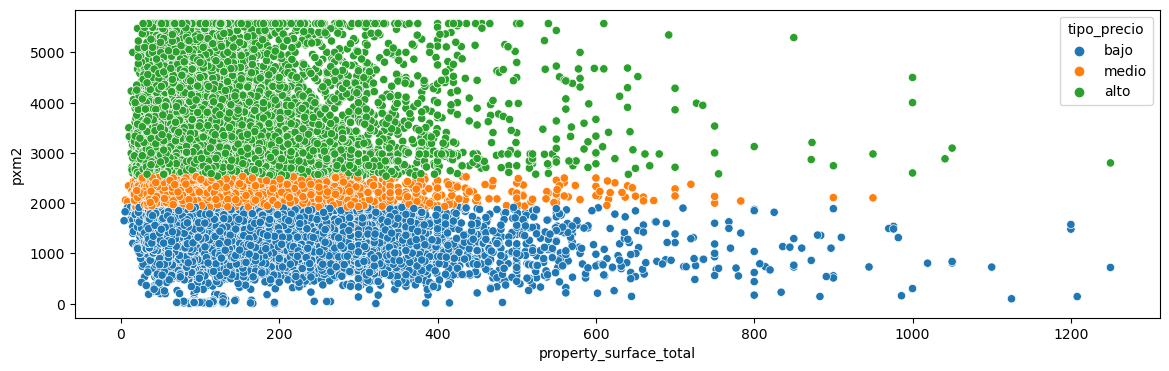

In [32]:
sns.scatterplot(data=df_tprecio1, x='property_surface_total', y="pxm2", hue="tipo_precio") 
plt.show()

Agrupamiento en tres partes, primera y ultima con 25% cada una, parte del medio con 50%

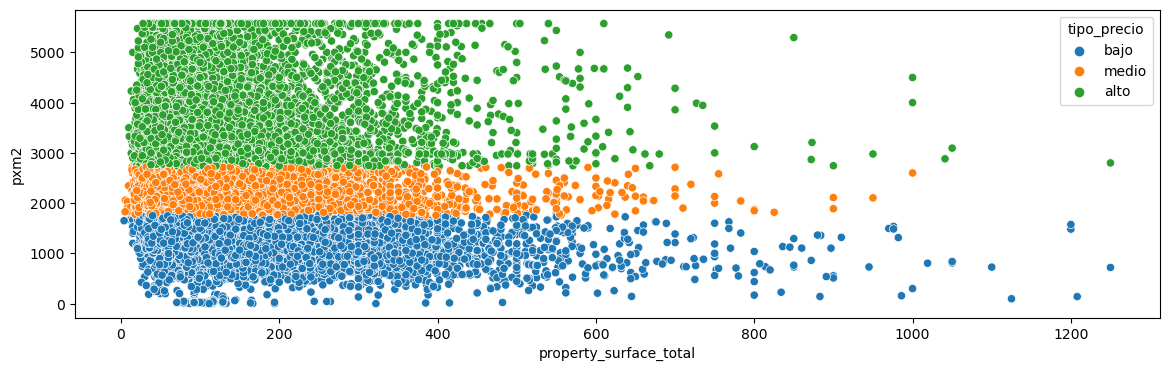

In [33]:
sns.scatterplot(data=df_tprecio2, x='property_surface_total', y="pxm2", hue="tipo_precio") 
plt.show()

Agrupamiento primero por tipo de propiedad, luego como en el item anterior

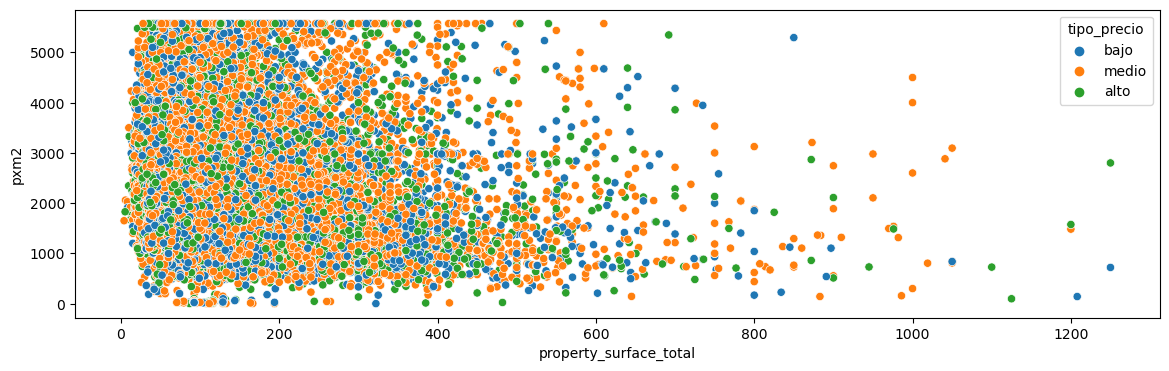

In [34]:
sns.scatterplot(data=df_tprecio3, x='property_surface_total', y="pxm2", hue="tipo_precio") 
plt.show()

### Seleccionar una de las alternativas, justificando la misma

In [35]:
df_tprecio = df_tprecio2 
df_tprecio

latitud   longitud              place_l3 property_type  \
0     -34.589974 -58.459133               Palermo          Casa   
1     -34.637319 -58.361124                  Boca  Departamento   
2     -34.628647 -58.361871                  Boca  Departamento   
3     -34.610027 -58.401934                  Once  Departamento   
4     -34.631621 -58.416825                 Boedo            PH   
...          ...        ...                   ...           ...   
82658 -34.603245 -58.489810      Villa del Parque  Departamento   
82659 -34.614063 -58.482814      Villa del Parque  Departamento   
82660 -34.614175 -58.479062      Villa del Parque  Departamento   
82661 -34.614175 -58.479062      Villa del Parque  Departamento   
82662 -34.599790 -58.373411  Centro / Microcentro  Departamento   

       property_rooms  property_bedrooms  property_surface_total  \
0                   4                  3              171.000000   
1                   3                  2               58.000000   
2                   4                  3               70.000000   
3                   4                  2              135.327513   
4                   4                  2              106.415511   
...               ...                ...                     ...   
82658               4                  3              130.000000   
82659               3                  2               68.000000   
82660               1                  1               51.000000   
82661               1                  1               37.000000   
82662               2                  1               84.000000   

       property_surface_covered  property_price    pxm2 tipo_precio  
0                         133.0        210000.0  1228.0        bajo  
1                          55.0         82900.0  1429.0        bajo  
2                          70.0         99000.0  1414.0        bajo  
3                         104.0        146000.0  1079.0        bajo  
4                          73.0        250000.0  2349.0       medio  
...                         ...             ...     ...         ...  
82658                     100.0        220000.0  1692.0        bajo  
82659                      60.0        161000.0  2368.0       medio  
82660                      30.0         75500.0  1480.0        bajo  
82661                      31.0         74500.0  2014.0       medio  
82662                      84.0        135000.0  1607.0        bajo  

[82663 rows x 11 columns]

Seleccionamos la segunda alternativa antes que la primera debido a que preferimos un agrupamiento equitativo (en cantidad), la tercer alternativa la descartamos ya que podemos notar que si primero agrupamos por propiedad y luego por tipo de precio obtenemos un resultado desordenado.

### Comparar, si aplica, la alternativa seleccionada con la division en 3 grupos obtenida utilizando agrupamiento por K Means

In [31]:
df_kmeans=pd.read_csv("./data/punto2.csv")

In [32]:
plt.scatter(df_kmeans.longitud, df_kmeans.property_price, c=df_kmeans.colores2, s=50, cmap='viridis')
plt.xlabel('longitud')
plt.ylabel('property price')
plt.title('scatter plot')

Text(0.5, 1.0, 'scatter plot')

In [33]:
sns.scatterplot(data=df_tprecio, x='longitud', y="pxm2", hue="tipo_precio") 

<AxesSubplot:title={'center':'scatter plot'}, xlabel='longitud', ylabel='property price'>

Se pueden comparar con la alternativa seleccionada ya que, como en el gráfico de kmeans, se puede observar que mientras más a la derecha vas mayor porcentaje de precios altos hay, esto quiere decir que, en barrios como podría ser Palermo el precio por metro cuadrado y su precio real son más elevados que en otras zonas. 

### Mostrar en un mapa de CABA los avisos coloreados por tipo_precio

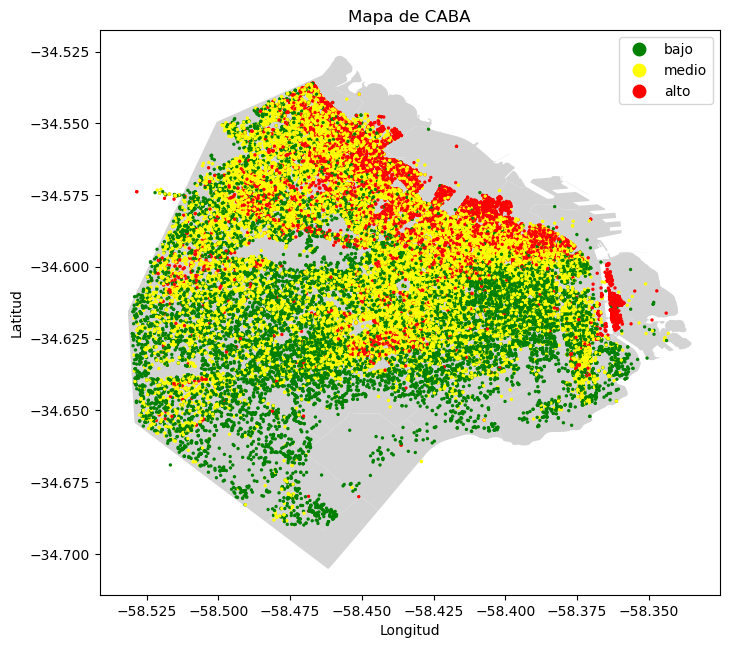

In [82]:
fig, ax = plt.subplots(figsize=(8,8))
barrios = gp.read_file("barrios.geojson")
ax.set_title('Mapa de CABA')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
barrios.plot(ax=ax,column='BARRIO', color='lightgrey')

color_dict = {'bajo':'green',  
              'medio':'yellow',
              'alto':'red' }

puntos = gp.GeoDataFrame(df_tprecio.tipo_precio, geometry=gp.points_from_xy(df_tprecio.longitud, df_tprecio.latitud))    
puntos.plot(ax = ax, column='tipo_precio', markersize=2, legend=True, 
            cmap=colors.ListedColormap(list(color_dict.values())))

plt.show()

# Ejercicio 3b

Entrenamiento y predicción. Predecir el valor del atributo tipo_precio, excluyendo del entrenamiento la variable price, pxm2, y cualquier otra variable que pueda contener información del precio de venta.

Realizar las tareas de ingeniería de características necesarias para trabajar con cada algoritmos (encoding, normalización, etc).

In [36]:
df_EyP=df_tprecio.copy()

In [37]:
df_EyP.dtypes

latitud                      float64
longitud                     float64
place_l3                      object
property_type                 object
property_rooms                 int64
property_bedrooms              int64
property_surface_total       float64
property_surface_covered     float64
property_price               float64
pxm2                         float64
tipo_precio                 category
dtype: object

Quito variables indicativas del precio de venta:

In [38]:
df_EyP.drop(['property_price', 'pxm2'], axis=1, inplace=True)

## Modelo 1 - Árbol de decisión

### Ajuste del dataset 

Creamos una copia del dataset del punto 1d:

In [86]:
df_dTree=df_EyP.copy()

Transformo variables categoricas para poder utilizarlas como predictorias

In [87]:
df_dTree = pd.get_dummies(df_dTree, columns=["place_l3","property_type"], drop_first=True)
df_dTree.head()

latitud   longitud  property_rooms  property_bedrooms  \
0 -34.589974 -58.459133               4                  3   
1 -34.637319 -58.361124               3                  2   
2 -34.628647 -58.361871               4                  3   
3 -34.610027 -58.401934               4                  2   
4 -34.631621 -58.416825               4                  2   

   property_surface_total  property_surface_covered tipo_precio  \
0              171.000000                     133.0        bajo   
1               58.000000                      55.0        bajo   
2               70.000000                      70.0        bajo   
3              135.327513                     104.0        bajo   
4              106.415511                      73.0       medio   

   place_l3_Agronomía  place_l3_Almagro  place_l3_Balvanera  ...  \
0                   0                 0                   0  ...   
1                   0                 0                   0  ...   
2                   0                 0                   0  ...   
3                   0                 0                   0  ...   
4                   0                 0                   0  ...   

   place_l3_Villa Ortuzar  place_l3_Villa Pueyrredón  place_l3_Villa Real  \
0                       0                          0                    0   
1                       0                          0                    0   
2                       0                          0                    0   
3                       0                          0                    0   
4                       0                          0                    0   

   place_l3_Villa Riachuelo  place_l3_Villa Santa Rita  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   place_l3_Villa Soldati  place_l3_Villa Urquiza  place_l3_Villa del Parque  \
0                       0                       0                          0   
1                       0                       0                          0   
2                       0                       0                          0   
3                       0                       0                          0   
4                       0                       0                          0   

   property_type_Departamento  property_type_PH  
0                           0                 0  
1                           1                 0  
2                           1                 0  
3                           1                 0  
4                           0                 1  

[5 rows x 65 columns]

Variables (features) que clasifican y variable (taget) a la que quiero calcular

In [98]:
#Creo un dataset con los features que voy a usar para clasificar
df_dTree_x=df_dTree.drop(['tipo_precio'], axis='columns', inplace=False)

#Creo un dataset con la variable target
df_dTree_y = df_dTree['tipo_precio'].copy()

#Genero los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(df_dTree_x, 
                                                    df_dTree_y, 
                                                    test_size=0.2,  #proporcion 80/20
                                                    random_state=2)

### Optimizacion de hiperparametros

Realizamos cross validation con 5 folds.

In [99]:
#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.05,10), 
               'max_depth':list(range(1,6))}
                
#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=5) # 5 folds para cross validation

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score, average="weighted")

#Random Search Cross validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=10) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': array([0.        , 0.00555556, 0.01111111, 0.01666667, 0.02222222,
       0.02777778, 0.03333333, 0.03888889, 0.04444444, 0.05      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5]},
                   scoring=make_scorer(f1_score, average=weighted))

Atributos considerados y su importancia

In [100]:
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,df_dTree.columns)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

longitud: 0.05037798563301666
place_l3_Boedo: 0.054445499883109684
place_l3_Pompeya: 0.1341120802529579
place_l3_Villa del Parque: 0.3155269631408643
latitud: 0.4455374710900515


### Construcción del árbol de decisión

Creo arbol con los mejores hiperparametros obtenidos en el item anterior

In [101]:
arbolcv=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Cross Validation
cv = cross_validate(arbolcv,
                    x_train, y_train, 
                    cv=kfoldcv,
                    scoring=scorer_fn,
                    return_estimator=True)

#Selecciono el arbol con mejor rendimiento
metricsCV=cv['test_score']
mejor_cv=cv['estimator'][np.where(metricsCV==max(metricsCV))[0][0]]
metricsCV

array([0.47394249, 0.47264121, 0.56150088, 0.47337131, 0.47657487])

Entreno el arbol con el conjunto de entrenamiento

#### Grafico del árbol de decisión

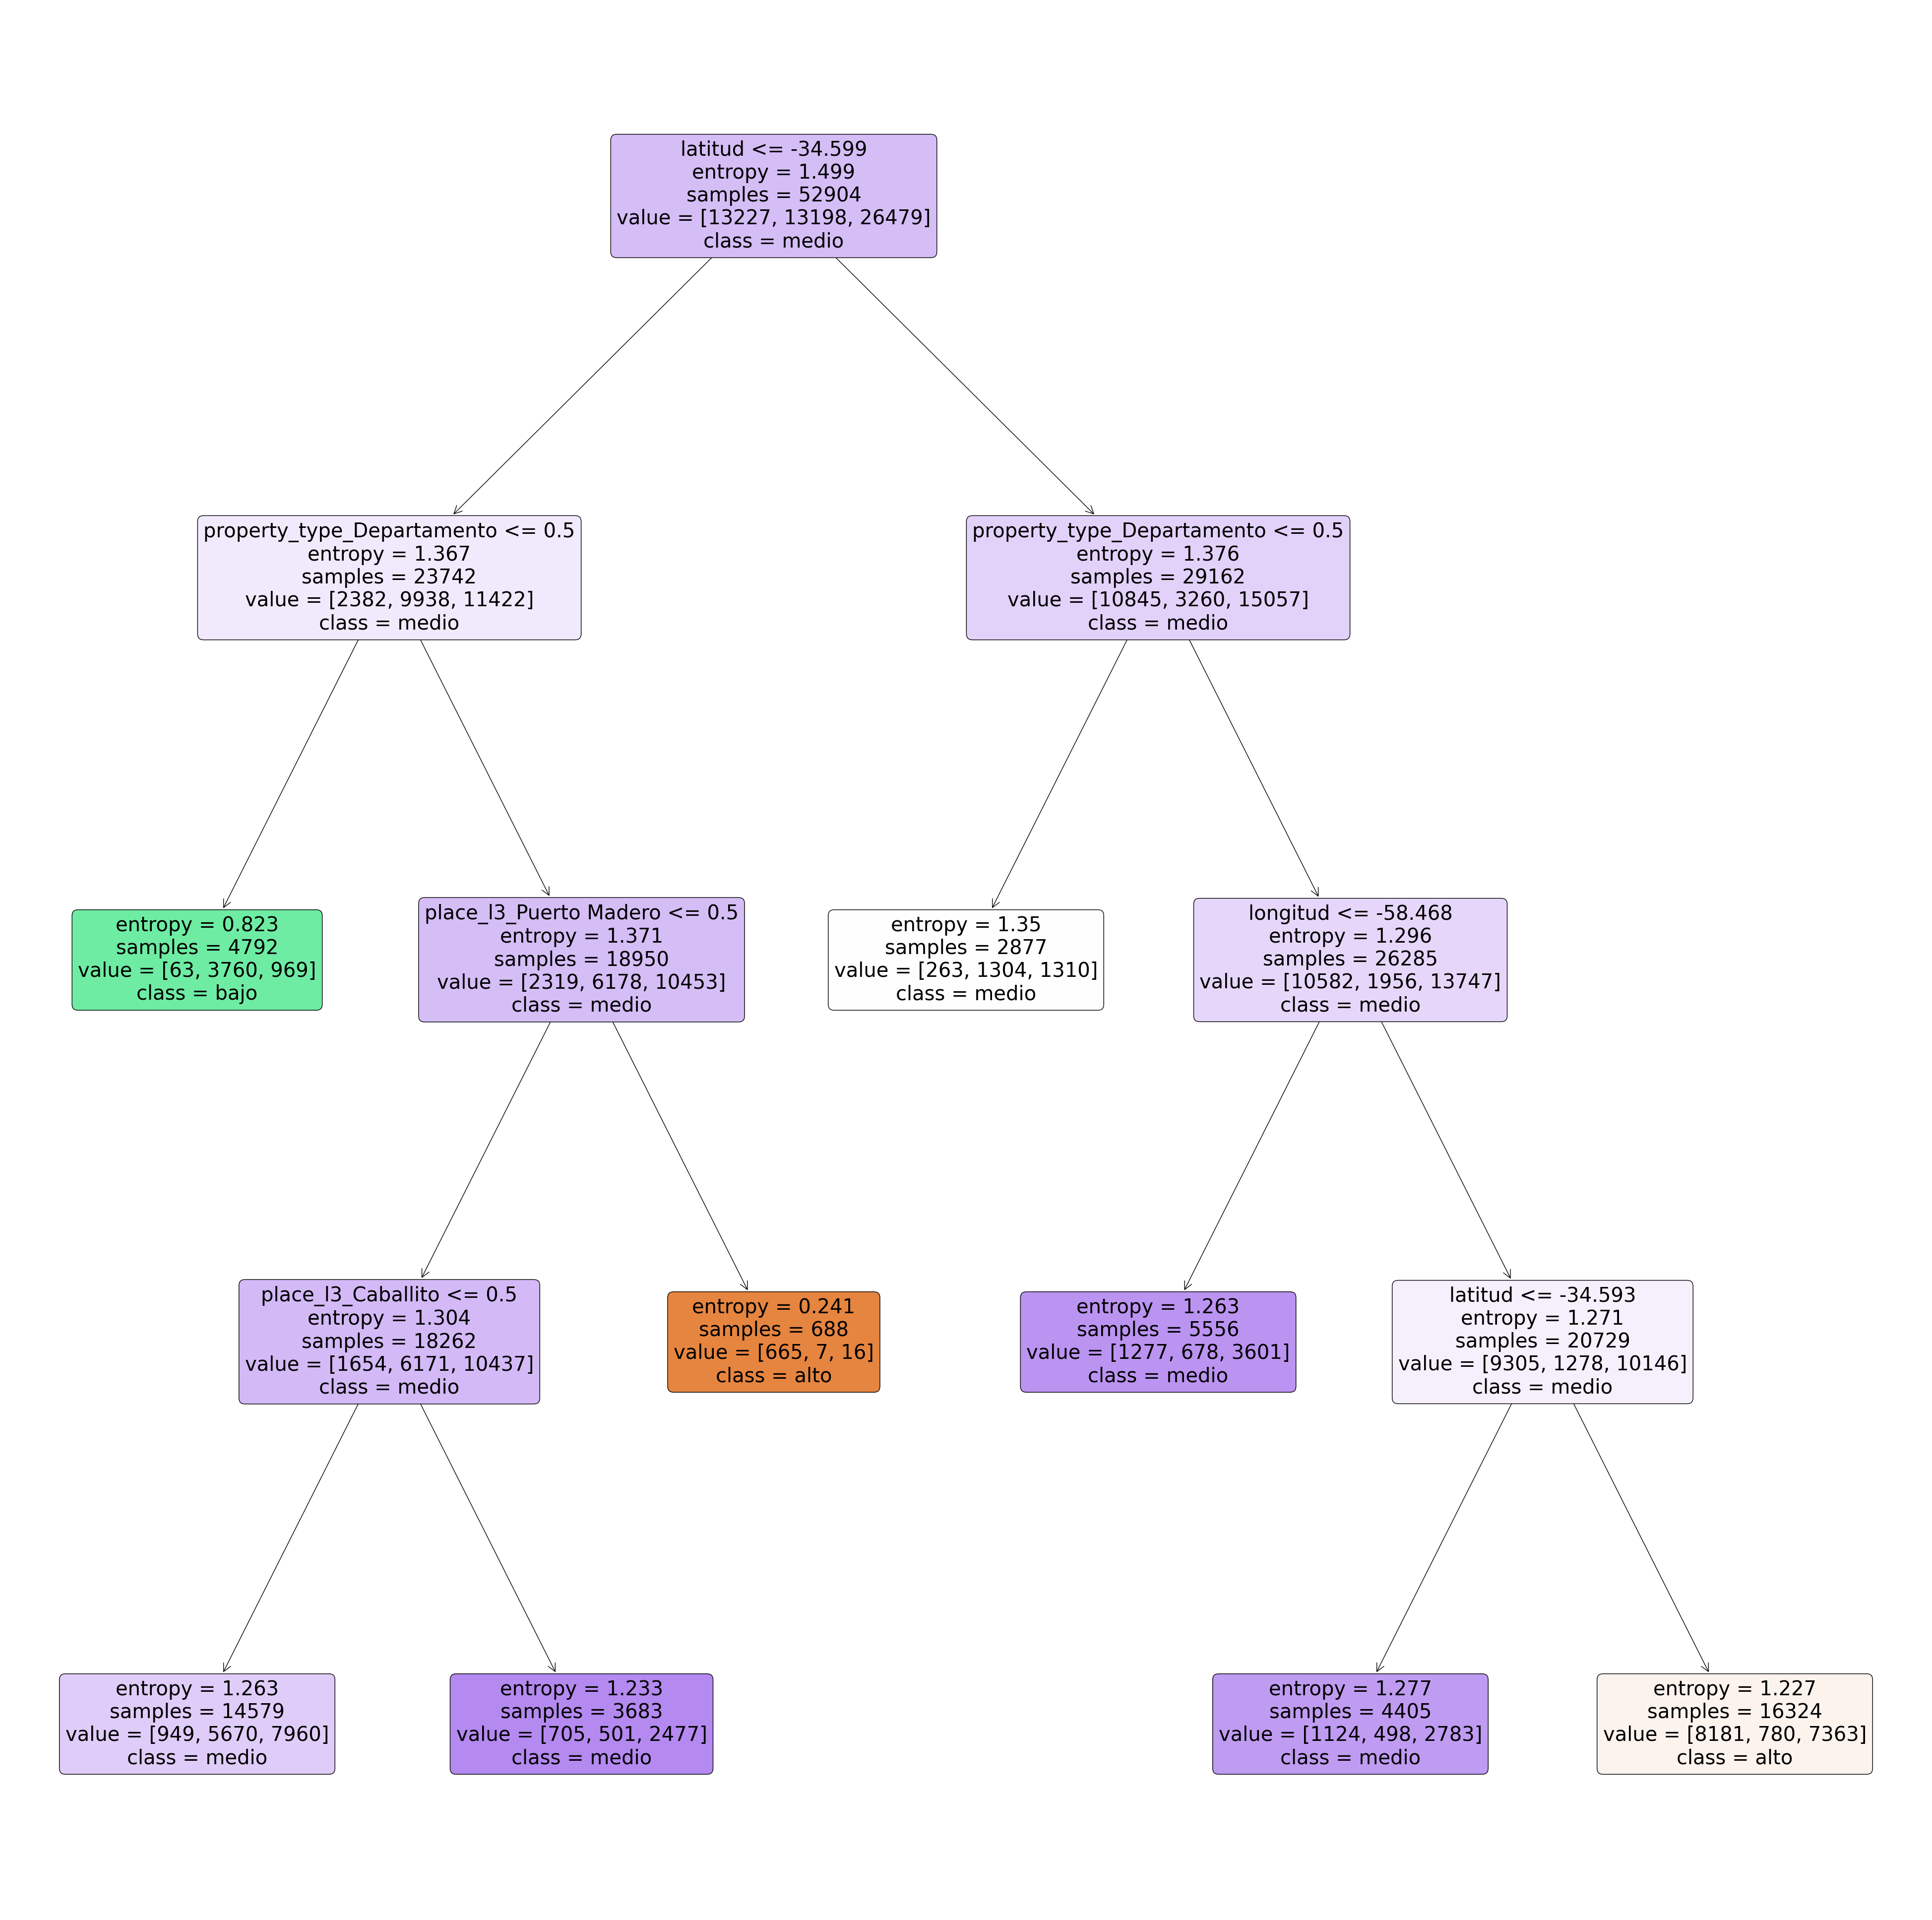

In [102]:
plt.figure(figsize=(50,50))

tree_plot=tree.plot_tree(mejor_cv,
                        feature_names=x_train.columns.to_list(),
                        filled=True,
                        rounded=True,
                        class_names=['alto', 'bajo', 'medio'])
plt.show(tree_plot)

### Analisis del árbol de decisión

In [103]:
feat_imps = mejor_cv.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,x_train.columns.to_list())):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))
print()

reglas = export_text(mejor_cv, feature_names=list(x_train.columns.to_list()))
print(reglas)

longitud: 0.04521107967884048
place_l3_Caballito: 0.05464924983957965
place_l3_Puerto Madero: 0.12796546413372928
property_type_Departamento: 0.2988446774493181
latitud: 0.47332952889853247

|--- latitud <= -34.60
|   |--- property_type_Departamento <= 0.50
|   |   |--- class: bajo
|   |--- property_type_Departamento >  0.50
|   |   |--- place_l3_Puerto Madero <= 0.50
|   |   |   |--- place_l3_Caballito <= 0.50
|   |   |   |   |--- class: medio
|   |   |   |--- place_l3_Caballito >  0.50
|   |   |   |   |--- class: medio
|   |   |--- place_l3_Puerto Madero >  0.50
|   |   |   |--- class: alto
|--- latitud >  -34.60
|   |--- property_type_Departamento <= 0.50
|   |   |--- class: medio
|   |--- property_type_Departamento >  0.50
|   |   |--- longitud <= -58.47
|   |   |   |--- class: medio
|   |   |--- longitud >  -58.47
|   |   |   |--- latitud <= -34.59
|   |   |   |   |--- class: medio
|   |   |   |--- latitud >  -34.59
|   |   |   |   |--- class: alto



El criterio principal de categorización es el de la latitud, zona norte o zona sur de CABA, los departamentos de zona norte son considerados de tipo de precio alto si se ubican cercanas al rio (Belgrano, Palermo, etc) y de precio medio en caso contrario. Los departamentos de zona sur son de precio alto si se encuentran dentro de Puerto Madero. Los PH y Casas de zona sur son de precio bajo, mientras que las de zona norte son de precio medio.

### Evaluación de la performance del árbol en el conjunto de evaluación

Entrenamos al modelo y vemos valores predichos

In [46]:
arbolcv_entrenado = arbolcv.fit(X = x_train, y = y_train)
y_pred = arbolcv.predict(x_test)
y_pred

array(['alto', 'medio', 'medio', ..., 'medio', 'medio', 'bajo'],
      dtype=object)

Valores reales

In [47]:
y_test.values

['alto', 'medio', 'medio', 'medio', 'alto', ..., 'medio', 'alto', 'medio', 'medio', 'medio']
Length: 16533
Categories (3, object): ['bajo' < 'medio' < 'alto']

Evaluación performance en el conjunto de evaluación.

In [48]:
y_pred = arbolcv.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,average="weighted")
f1=f1_score(y_test,y_pred,average="weighted")

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.6226335208371137
Recall: 0.6226335208371137
f1 score: 0.6148771367154431


Matriz de confución

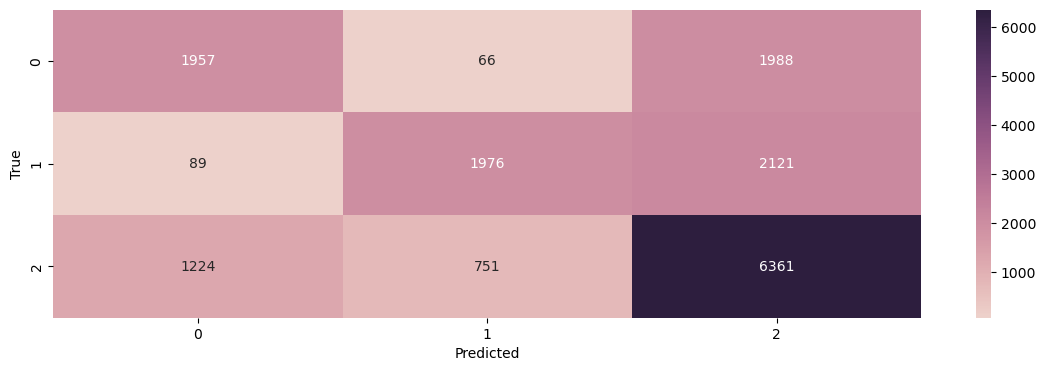

In [49]:
mc=confusion_matrix(y_test, y_pred)

sns.heatmap(mc, annot=True, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Poner aca la explicacion de la matriz una vez que se llegue al arbol final

### Entrenamiento con PCA

In [105]:
df_EyP_pca=pd.read_csv('./data/properati_argentina_2021_pca.csv')
df_EyP_pca.dtypes

Unnamed: 0      int64
cp_1          float64
cp_2          float64
cp_3          float64
cp_4          float64
dtype: object

Agregamos columna tipo_precio  al dataset

In [106]:
df_EyP_pca["tipo_precio"] = df_EyP["tipo_precio"]
df_EyP_pca.drop("Unnamed: 0",axis=1, inplace=True) # Unnamed: 0 se saca guardando el csv sin indice -> df.to_csv(path, index=False)
df_EyP_pca.head(5)

cp_1      cp_2      cp_3      cp_4 tipo_precio
0  1.139176 -0.271169 -0.498788 -0.552974        bajo
1 -0.104752 -0.417369  2.552470  0.379832        bajo
2  0.876484 -0.830565  2.288006  0.304368        bajo
3  0.490174 -0.253999  1.070014  0.156944        bajo
4  0.576405 -0.457544  1.371738 -0.402199       medio

In [107]:
# El dataset probablemente tenga valores nan porque no se corre hace mucho
df_EyP_pca.dropna(inplace=True)
df_EyP_pca.isna().sum()

cp_1           0
cp_2           0
cp_3           0
cp_4           0
tipo_precio    0
dtype: int64

Optimización de hiperparametros y construcción del árbol

In [108]:
#Creo un dataset con los features que voy a usar para clasificar
df_dTree_x=df_EyP_pca.drop(['tipo_precio'], axis='columns', inplace=False)

#Creo un dataset con la variable target
df_dTree_y = df_EyP_pca['tipo_precio'].copy()

#Genero los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(df_dTree_x, 
                                                    df_dTree_y, 
                                                    test_size=0.2,  #proporcion 80/20
                                                    random_state=2)

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.05,10), 
               'max_depth':list(range(1,10))}
                
#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=5) # 5 folds para cross validation

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score, average="weighted")

#Random Search Cross validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=10) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train)   

arbolcv=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Cross Validation
cv = cross_validate(arbolcv,
                    x_train, y_train, 
                    cv=kfoldcv,
                    scoring=scorer_fn,
                    return_estimator=True)

#Selecciono el arbol con mejor rendimiento
metricsCV=cv['test_score']
mejor_cv=cv['estimator'][np.where(metricsCV==max(metricsCV))[0][0]]
metricsCV

array([0.40761579, 0.39516095, 0.4140002 , 0.39266345, 0.400166  ])

Grafico del árbol

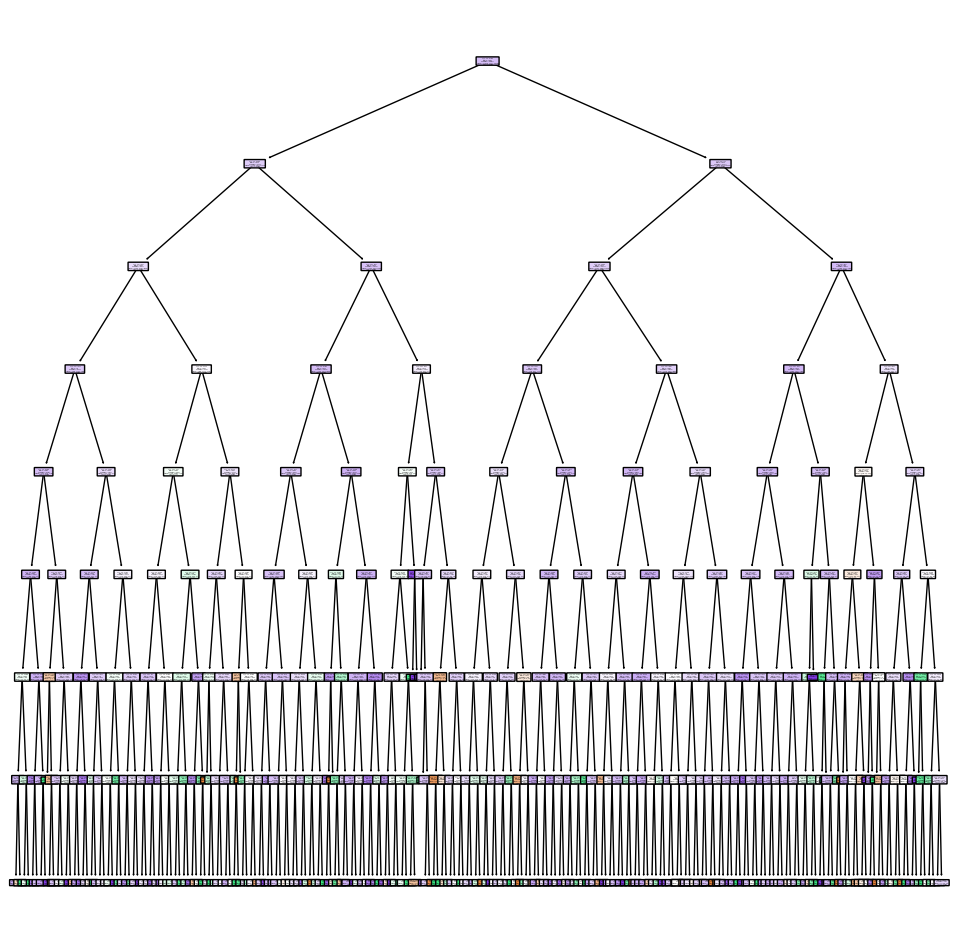

In [109]:
plt.figure(figsize=(12,12))

tree_plot=tree.plot_tree(mejor_cv,
                        feature_names=x_train.columns.to_list(),
                        filled=True,
                        rounded=True,
                        class_names=['alto', 'bajo', 'medio'])
plt.show(tree_plot)

## Modelo 2 - Random forest

In [39]:
df_randomF = df_EyP.copy()
df_randomF = pd.get_dummies(df_randomF, columns=["place_l3","property_type"], drop_first=True)
df_randomF['tipo_precio'] = pd.factorize(df_randomF.tipo_precio)[0]
df_randomF.head()

latitud   longitud  property_rooms  property_bedrooms  \
0 -34.589974 -58.459133               4                  3   
1 -34.637319 -58.361124               3                  2   
2 -34.628647 -58.361871               4                  3   
3 -34.610027 -58.401934               4                  2   
4 -34.631621 -58.416825               4                  2   

   property_surface_total  property_surface_covered  tipo_precio  \
0              171.000000                     133.0            0   
1               58.000000                      55.0            0   
2               70.000000                      70.0            0   
3              135.327513                     104.0            0   
4              106.415511                      73.0            1   

   place_l3_Agronomía  place_l3_Almagro  place_l3_Balvanera  ...  \
0                   0                 0                   0  ...   
1                   0                 0                   0  ...   
2                   0                 0                   0  ...   
3                   0                 0                   0  ...   
4                   0                 0                   0  ...   

   place_l3_Villa Ortuzar  place_l3_Villa Pueyrredón  place_l3_Villa Real  \
0                       0                          0                    0   
1                       0                          0                    0   
2                       0                          0                    0   
3                       0                          0                    0   
4                       0                          0                    0   

   place_l3_Villa Riachuelo  place_l3_Villa Santa Rita  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   place_l3_Villa Soldati  place_l3_Villa Urquiza  place_l3_Villa del Parque  \
0                       0                       0                          0   
1                       0                       0                          0   
2                       0                       0                          0   
3                       0                       0                          0   
4                       0                       0                          0   

   property_type_Departamento  property_type_PH  
0                           0                 0  
1                           1                 0  
2                           1                 0  
3                           1                 0  
4                           0                 1  

[5 rows x 65 columns]

In [40]:
df_randomF_x = df_randomF.drop(columns = "tipo_precio")
df_randomF_y = df_randomF['tipo_precio']

#Generamos los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(
                                        df_randomF_x, 
                                        df_randomF_y, 
                                        test_size=0.2,  #proporcion 80/20
                                        random_state=42
                                    )
# Creación del modelo
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
scores = cross_val_score(
                    random_forest,
                    df_randomF_x,
                    df_randomF_y,
                    scoring="neg_mean_squared_error",
                    cv=10,
                    n_jobs=-1
                )

rmse = np.sqrt(-scores)
print("Valores RMSE: ", np.round(rmse, 2))
print("Promedio RMSE: ", np.mean(rmse))


Valores RMSE:  [0.55 0.55 0.55 0.55 0.56 0.55 0.55 0.56 0.55 0.55]
Promedio RMSE:  0.5521790447361528


In [58]:
# Error test del modelo inicial
predicciones = random_forest.predict(X = x_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )

print(f"El error RMSE de test es: {rmse}")

El error RMSE de test es: 0.5495471376443284


### Optimizamos los hiperparámetros

El modelo inicial se entreno manteniendo los hiperparámetros con su valor por defecto. No podemos saber cuál es el valor más adecuado, la forma de obtenerlos es mediante el uso de estrategias de validación, por ejemplo con GridSearchCV

In [59]:
param_dist = {
            'max_depth': [2,3,5,10],
            'min_samples_leaf': [5,10,20,50,100,200],
            'n_estimators': [10,25,30,50,100,200],
            'max_features': ['sqrt', 'log2'],
            'criterion': ['gini', 'entropy']
        }

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=5) # 5 folds para cross validation

grid_search = RandomizedSearchCV( # GridSearchCV
                random_forest,
                param_distributions = params_grid, #param_grid=param_dist,
                cv = kfoldcv, 
                n_jobs = -1
            )

grid_search.fit(x_train, y_train)
rf_best = grid_search.best_params_
print(f"Mejores parámetros: {rf_best} \n Mejor score {grid_search.best_score_} \n")

Mejores parámetros: {'max_depth': 7, 'criterion': 'gini', 'ccp_alpha': 0.0} 
 Mejor score 0.6149856343565704 



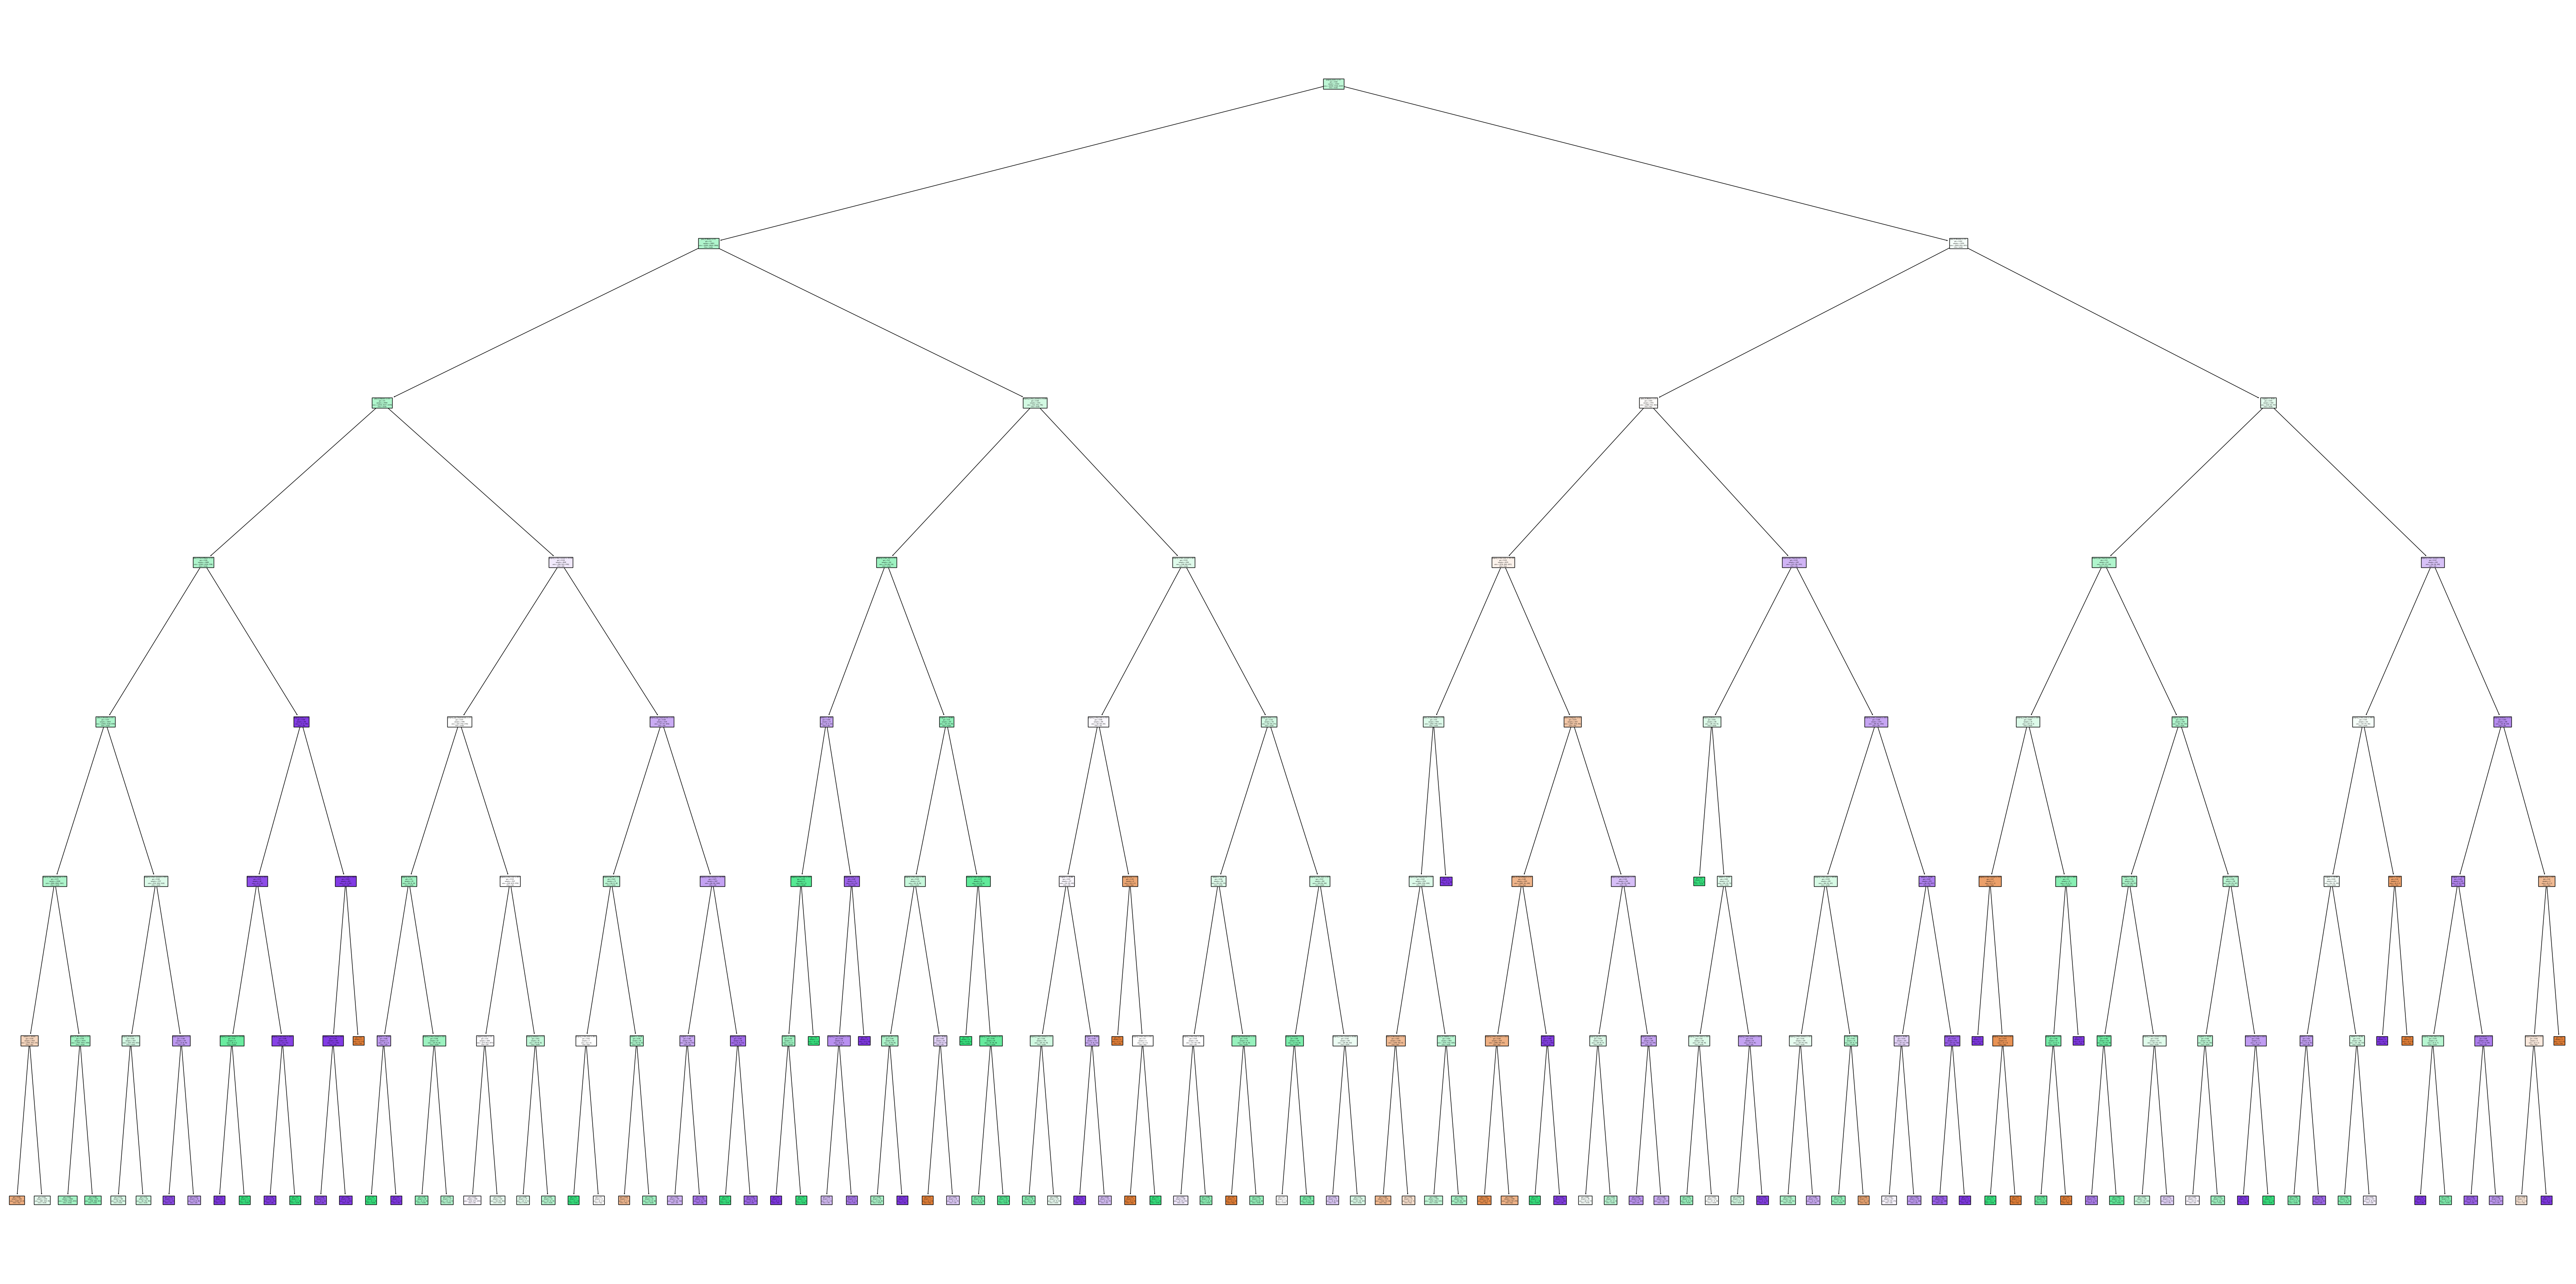

In [60]:
#Visualizamos los datos
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(grid_search.best_estimator_[5], feature_names = df_randomF_x.columns,class_names=['bajo', 'medio', 'alto'],filled=True)
plt.show()

Seteamos los mejores parámetros encontrados para el modelo

In [61]:
random_forest.set_params(
                criterion = 'gini',
                max_features = 'sqrt', 
                max_depth = 10,
                min_samples_leaf=5,
                n_estimators=100
            )

random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

Error luego de setear los hiperparámetros

In [62]:
predicciones = random_forest.predict(X = x_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )

print(f"El error RMSE de test es: {rmse}")

El error RMSE de test es: 0.6126748494747066


[[1973 2103   46]
 [ 542 7132  613]
 [  43 2592 1489]]


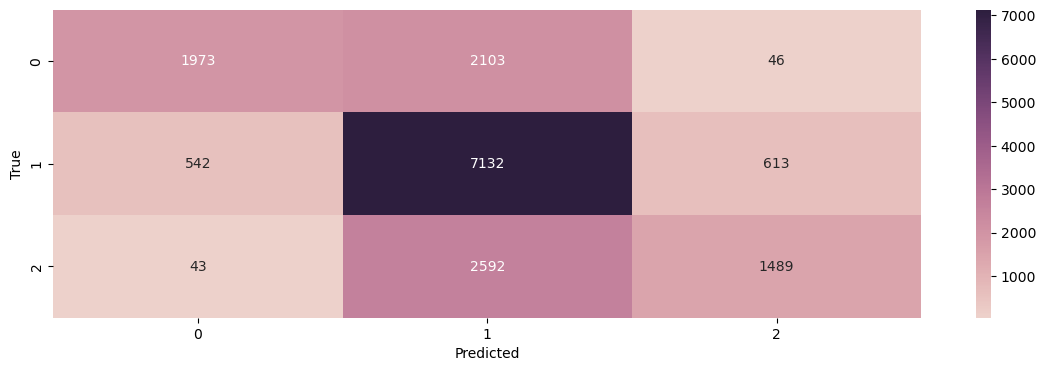

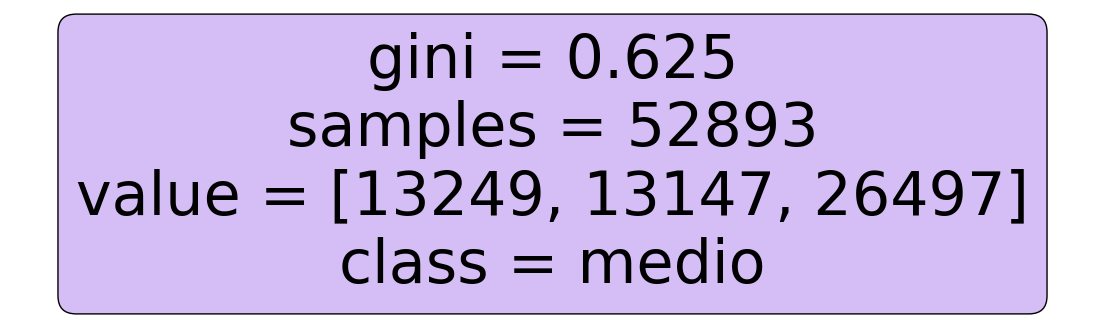

In [63]:
# Matriz
mc = confusion_matrix(y_test, predicciones)
print(mc)

# Heatmap
sns.heatmap(mc, annot=True, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True))

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

tree_plot=tree.plot_tree(mejor_cv,
                        feature_names=x_train.columns.to_list(),
                        filled=True,
                        rounded=True,
                        class_names=['alto', 'bajo', 'medio'])
plt.show()

### Entrenamiento con PCA

In [41]:
df_randomF_pca=pd.read_csv('./data/properati_argentina_2021_pca.csv')

df_randomF_pca["tipo_precio"] = df_EyP["tipo_precio"]
df_randomF_pca.drop("Unnamed: 0",axis=1, inplace=True)

df_randomF_pca.dropna(inplace=True)

df_randomF_pca_x = df_randomF_pca.drop(columns = "tipo_precio")
df_randomF_pca_y = df_randomF_pca['tipo_precio']

#Generamos los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(
                                        df_randomF_pca_x, 
                                        df_randomF_pca_y, 
                                        test_size=0.2,  #proporcion 80/20
                                        random_state=42
                                    )
# Creación del modelo
random_forest_pca = RandomForestClassifier(random_state=42)

random_forest_pca.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

#### Optimización de hiperparametros

In [42]:
param_dist = {
            'max_depth': [2,3,5,10],
            'min_samples_leaf': [5,10,20,50,100,200],
            'n_estimators': [10,25,30,50,100,200],
            'max_features': ['sqrt', 'log2'],
            'criterion': ['gini', 'entropy']
        }

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=5) # 5 folds para cross validation

grid_search = GridSearchCV(
                random_forest_pca,
                param_grid=param_dist,
                cv = kfoldcv, 
                n_jobs = -1
            )

grid_search.fit(x_train, y_train)
rf_best = grid_search.best_params_
print(f"Mejores parámetros: {rf_best} \n Mejor score {grid_search.best_score_} \n")

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 200} 
 Mejor score 0.5048097153216917 



<Figure size 8000x4000 with 0 Axes>

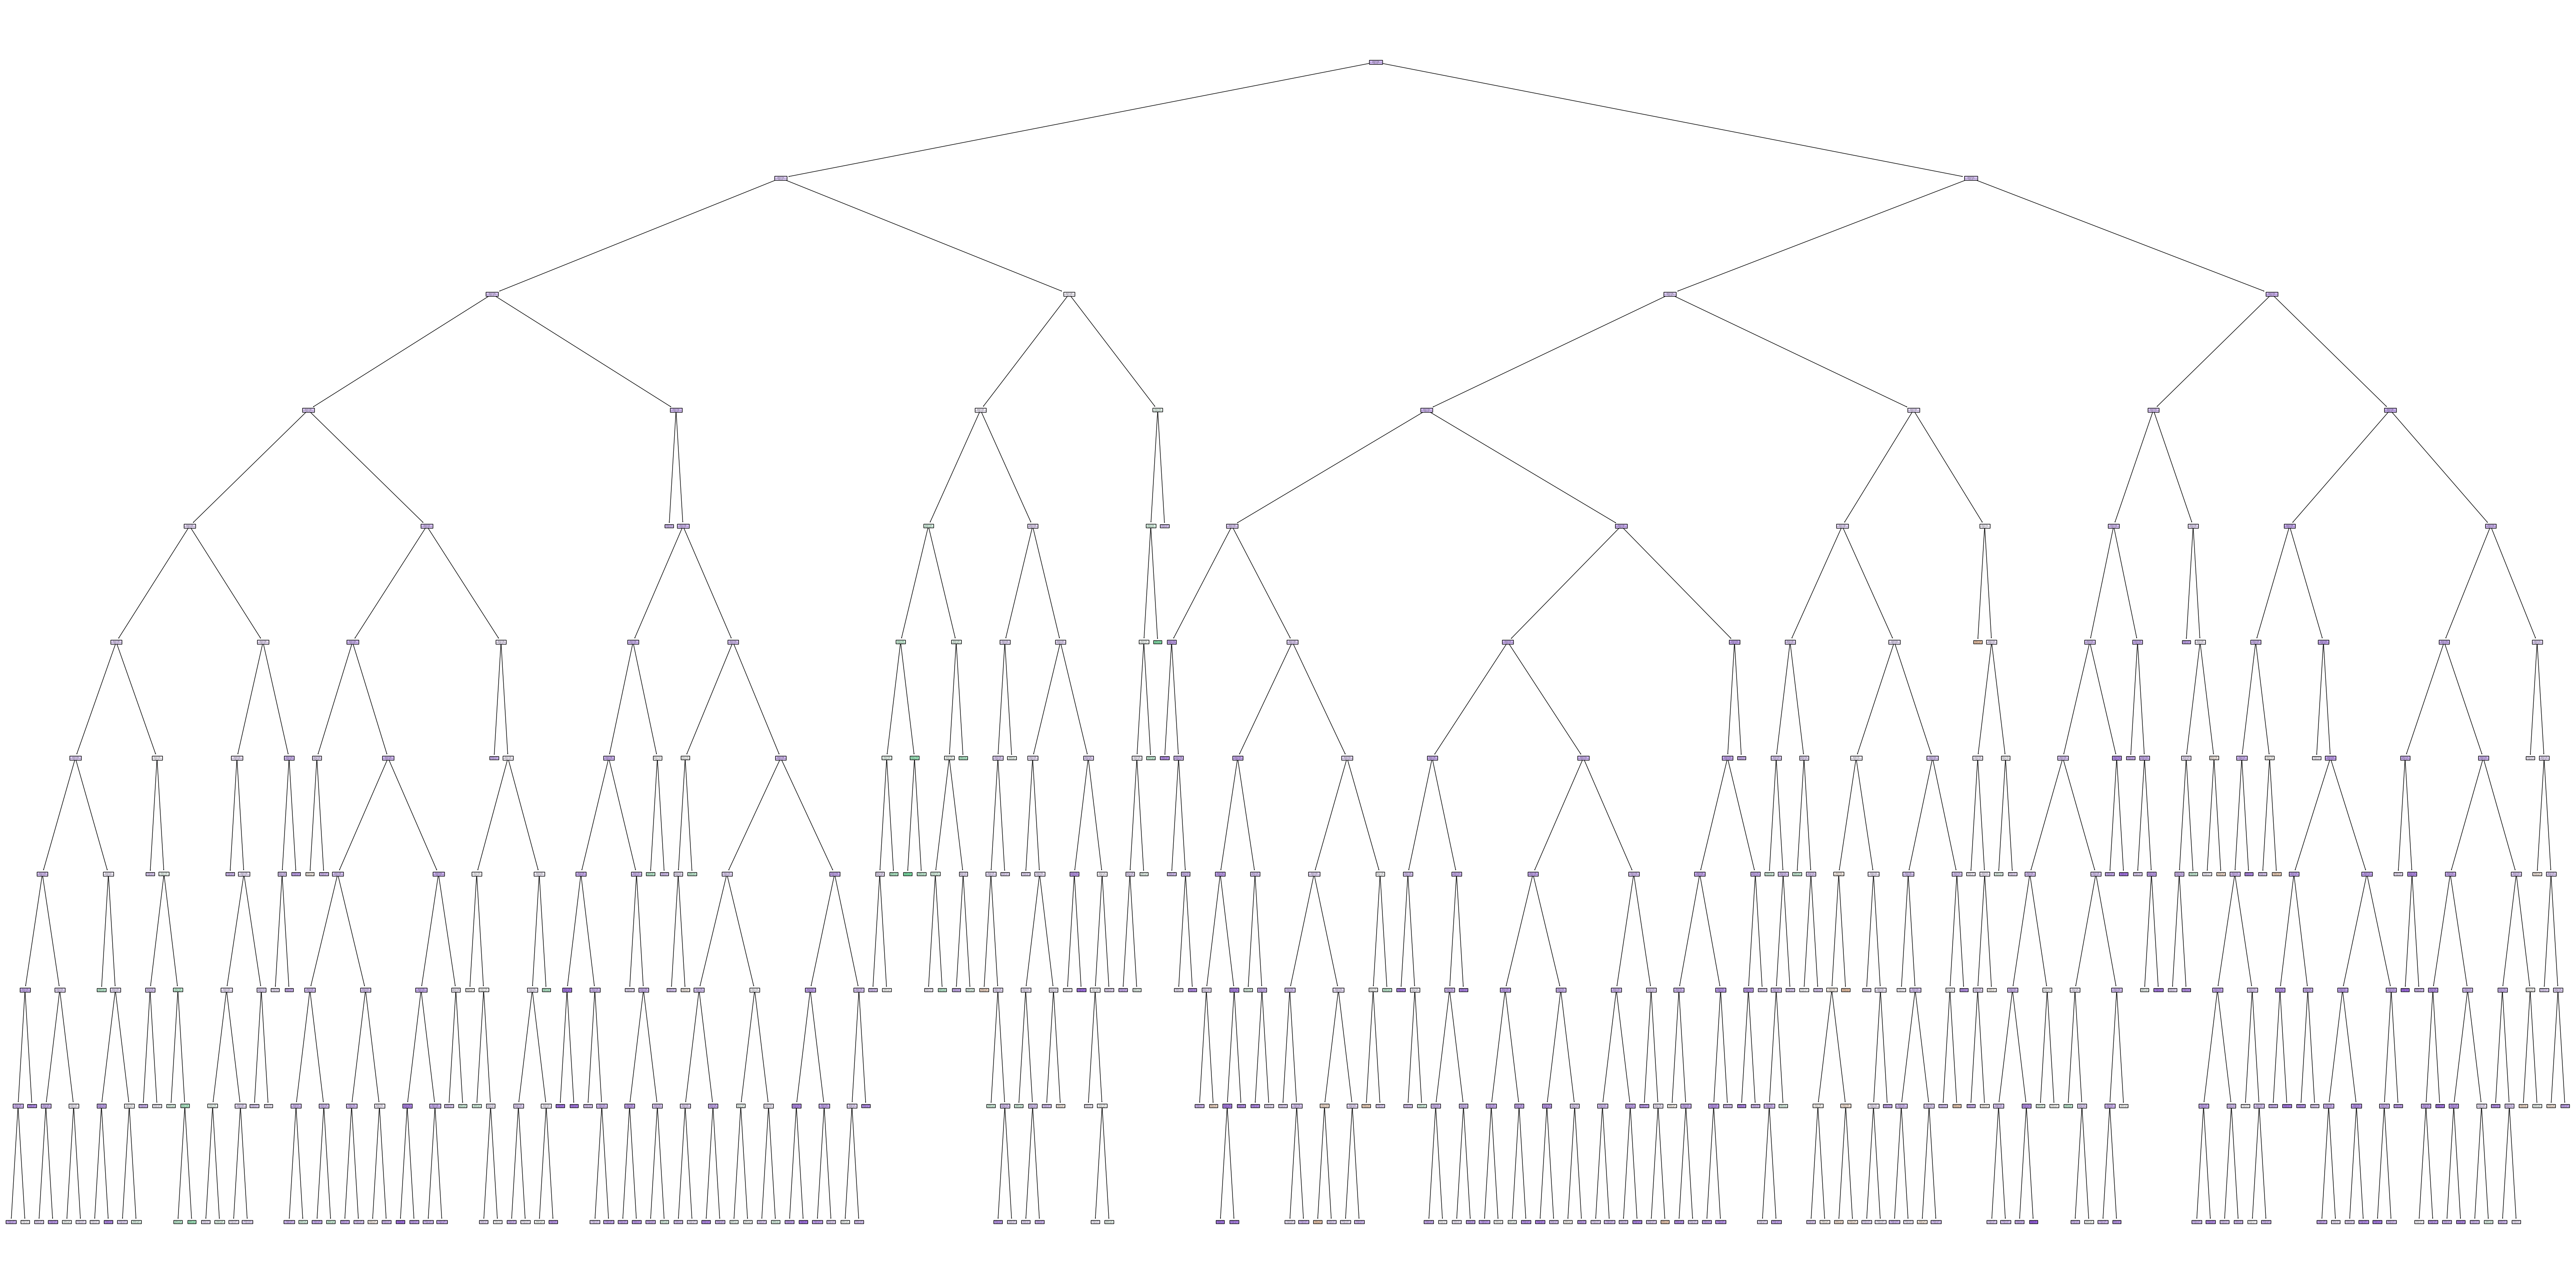

In [44]:
from sklearn.tree import plot_tree
#Visualizamos los datos
plt.figure(figsize=(80,40))
plot_tree(grid_search.best_estimator_[5], feature_names = df_randomF_pca_x.columns,class_names=['bajo', 'medio', 'alto'],filled=True)
plt.show()

In [46]:
#Seteamos los mejores hiperparametros encontrados
random_forest_pca.set_params(
                criterion = 'entropy',
                max_features = 'sqrt', 
                max_depth = 10,
                min_samples_leaf=50,
                n_estimators=200
            )

random_forest_pca.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       n_estimators=200, random_state=42)

Error luego de setear los hiperparámetros

## Modelo 3 - KNN

In [64]:
df_KNN=df_EyP.copy()
df_KNN

latitud   longitud              place_l3 property_type  \
0     -34.589974 -58.459133               Palermo          Casa   
1     -34.637319 -58.361124                  Boca  Departamento   
2     -34.628647 -58.361871                  Boca  Departamento   
3     -34.610027 -58.401934                  Once  Departamento   
4     -34.631621 -58.416825                 Boedo            PH   
...          ...        ...                   ...           ...   
82658 -34.603245 -58.489810      Villa del Parque  Departamento   
82659 -34.614063 -58.482814      Villa del Parque  Departamento   
82660 -34.614175 -58.479062      Villa del Parque  Departamento   
82661 -34.614175 -58.479062      Villa del Parque  Departamento   
82662 -34.599790 -58.373411  Centro / Microcentro  Departamento   

       property_rooms  property_bedrooms  property_surface_total  \
0                   4                  3              171.000000   
1                   3                  2               58.000000   
2                   4                  3               70.000000   
3                   4                  2              135.327513   
4                   4                  2              106.415511   
...               ...                ...                     ...   
82658               4                  3              130.000000   
82659               3                  2               68.000000   
82660               1                  1               51.000000   
82661               1                  1               37.000000   
82662               2                  1               84.000000   

       property_surface_covered tipo_precio  
0                         133.0        bajo  
1                          55.0        bajo  
2                          70.0        bajo  
3                         104.0        bajo  
4                          73.0       medio  
...                         ...         ...  
82658                     100.0        bajo  
82659                      60.0       medio  
82660                      30.0        bajo  
82661                      31.0       medio  
82662                      84.0        bajo  

[82663 rows x 9 columns]

In [65]:
df_KNN = pd.get_dummies(df_KNN, columns=["place_l3","property_type"], drop_first=True)

In [66]:
df_KNN['tipo_precio'] = df_KNN['tipo_precio'].map({'bajo':0,'medio':1,'alto':2},na_action=None)
df_KNN['tipo_precio'].astype('int64')

0        0
1        0
2        0
3        0
4        1
        ..
82658    0
82659    1
82660    0
82661    1
82662    0
Name: tipo_precio, Length: 82663, dtype: int64

In [67]:
df_KNN.head()

latitud   longitud  property_rooms  property_bedrooms  \
0 -34.589974 -58.459133               4                  3   
1 -34.637319 -58.361124               3                  2   
2 -34.628647 -58.361871               4                  3   
3 -34.610027 -58.401934               4                  2   
4 -34.631621 -58.416825               4                  2   

   property_surface_total  property_surface_covered tipo_precio  \
0              171.000000                     133.0           0   
1               58.000000                      55.0           0   
2               70.000000                      70.0           0   
3              135.327513                     104.0           0   
4              106.415511                      73.0           1   

   place_l3_Agronomía  place_l3_Almagro  place_l3_Balvanera  ...  \
0                   0                 0                   0  ...   
1                   0                 0                   0  ...   
2                   0                 0                   0  ...   
3                   0                 0                   0  ...   
4                   0                 0                   0  ...   

   place_l3_Villa Ortuzar  place_l3_Villa Pueyrredón  place_l3_Villa Real  \
0                       0                          0                    0   
1                       0                          0                    0   
2                       0                          0                    0   
3                       0                          0                    0   
4                       0                          0                    0   

   place_l3_Villa Riachuelo  place_l3_Villa Santa Rita  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   place_l3_Villa Soldati  place_l3_Villa Urquiza  place_l3_Villa del Parque  \
0                       0                       0                          0   
1                       0                       0                          0   
2                       0                       0                          0   
3                       0                       0                          0   
4                       0                       0                          0   

   property_type_Departamento  property_type_PH  
0                           0                 0  
1                           1                 0  
2                           1                 0  
3                           1                 0  
4                           0                 1  

[5 rows x 65 columns]

In [68]:
# Seleccione variable para predecir
X = df_KNN.drop(["tipo_precio"], axis=1)
y = df_KNN[['tipo_precio']]

#Separacion Train/test  (80/20) según lo pedido
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)

In [69]:
#Creamos el modelo
knn = KNeighborsClassifier()

#Miramos los parámetros por defecto
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [70]:
# Variamos la cantidad de vecinos (K)
metrics = [] #cantidad de vecinos y cantidad de aciertos

k_range=range(1, 200,5) # vecinos desde 1 hasta 200 con intervalos de 5

for n in k_range:

    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    metrics.append((n, int((y_test == y_pred).sum())))

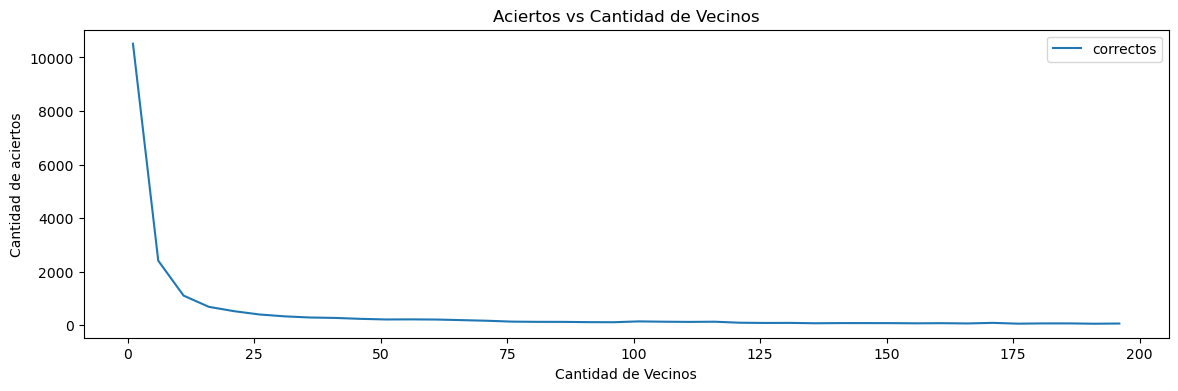

In [71]:
# ploteamos
df_metrics = pd.DataFrame(metrics, columns=['cant_vecinos', 'correctos'])

ax = df_metrics.plot( x='cant_vecinos', 
                      y='correctos',
                      title='Aciertos vs Cantidad de Vecinos'
                     )

ax.set_ylabel("Cantidad de aciertos")
ax.set_xlabel("Cantidad de Vecinos")
plt.show()

En el intervalo 1 a 15 se ve que la performance es mejor, variamos la cantidad de vecinos a ese rango

In [72]:
metrics = [] #cantidad de vecinos y cantidad de aciertos

k_range=range(1, 15,1) # vecinos desde 1 hasta 15 con salto de 1

for n in k_range:

    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    metrics.append((n, int((y_test == y_pred).sum())))

Volvemos a plottear

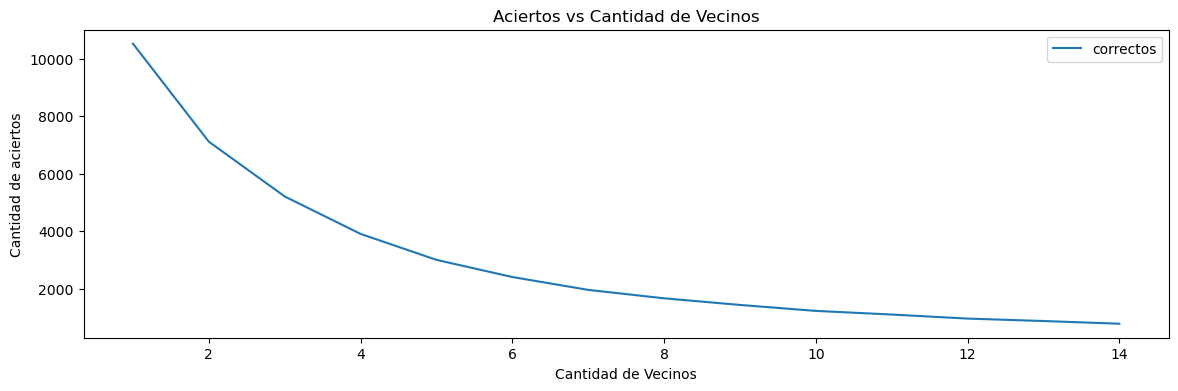

In [73]:
df_metrics = pd.DataFrame(metrics, columns=['cant_vecinos', 'correctos'])

ax = df_metrics.plot( x='cant_vecinos', 
                      y='correctos',
                      title='Aciertos vs Cantidad de Vecinos'
                     )

ax.set_ylabel("Cantidad de aciertos")
ax.set_xlabel("Cantidad de Vecinos")
plt.show()

In [74]:
params_grid = { 'n_neighbors':range(1,15,1), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['cityblock',
              'euclidean',
              'manhattan',]
             }
params_grid

{'n_neighbors': range(1, 15),
 'weights': ['distance', 'uniform'],
 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'metric': ['cityblock', 'euclidean', 'manhattan']}

In [75]:
cantidad_tuplas = 1
for param in params_grid:
    cantidad_tuplas *= len(params_grid[param])
cantidad_tuplas

252

In [76]:
#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds 
grid = RandomizedSearchCV(knn, params_grid, cv=10, scoring='neg_root_mean_squared_error', n_iter=20, random_state=2)

grid.fit(X_train, y_train)
grid.cv_results_['mean_test_score']

array([-0.69731909, -0.68340589, -0.68321473, -0.67488974, -0.67546616,
       -0.68669896, -0.67909366, -0.68540838, -0.69954448, -0.71247045,
       -0.65863334, -0.67422898, -0.66134618, -0.66172528, -0.67803943,
       -0.69299035, -0.68390545, -0.68353678, -0.67422898, -0.66151977])

Mejores parametros

In [77]:
print(grid.best_params_)

{'weights': 'distance', 'n_neighbors': 6, 'metric': 'cityblock', 'algorithm': 'ball_tree'}


Mejor metrica

In [78]:
print(grid.best_score_)

-0.6586333384013711


In [79]:
#Mejor estimador
best_knn=grid.best_estimator_

#Predicción con mejor estimador
y_pred_test=best_knn.predict(X_test)
y_pred_train=best_knn.predict(X_train)

In [80]:
predicciones = best_knn.predict(X = x_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )

print(f"El error RMSE de test es: {rmse}")

El error RMSE de test es: 0.9935678944238564


[[1072 2102 1012]
 [2048 4241 2047]
 [1008 2044  959]]


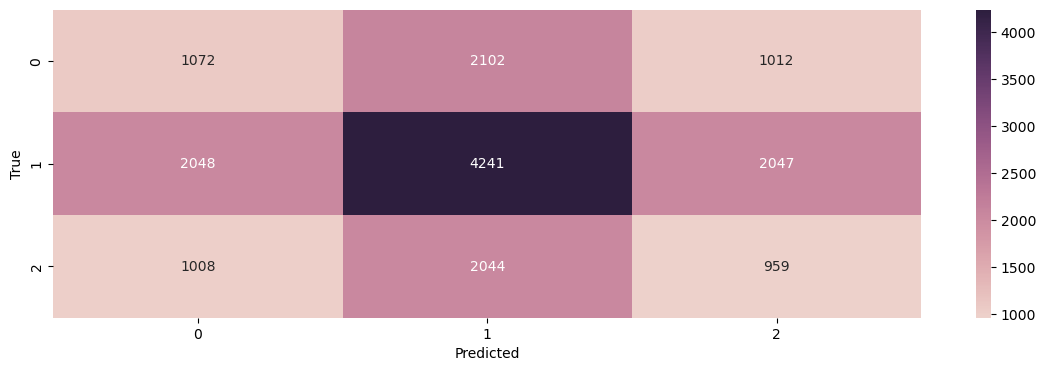

In [81]:
# Matriz
mc = confusion_matrix(y_test, predicciones)
print(mc)

# Heatmap
sns.heatmap(mc, annot=True, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True))

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Podemos observar que ambos arboles de decisión crean reglas que uno puede asumir como correctas, si el barrio es puerto madero, o que los edificios que se ubican en zona norte de la capital tienden a ser de un tipo de precio mas elevado.
El tercer modelo elegido, KNN, no dar estimaciones correctas.

# Conclusiones

Se pudieron observar como los distintos modelos crean reglas que podemos tomar como las correctas tienden a se de un tipo de precio más elevado, como por ejemplo, el Árbol de decisión se puede ver que los precios son más altos
si el inmobiliario esta cerca de un río o si se encuentran dentro de barrios como 'Puerto Madero'. Pero con el 
tercer modelo elegido no pudimos dar estimaciones correctas acerca de como varían los precios.